# 1. Load dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Displaying at least 50 columns
pd.set_option('display.max_columns',50)

In [3]:
# Load data file
df = pd.read_csv('.//DETALLE ORDENES CANCELADAS_CL.csv')
df1 = pd.read_csv('.//DETALLE ORDENES CANCELADAS_EC.csv')
df2 = pd.read_csv('.//DETALLE ORDENES CANCELADAS_PE.csv')

In [4]:
#Merging the datasets for the three countries Chile, Ecuador and Peru
merged_df = pd.concat([df, df1, df2], axis=0, ignore_index=True)
df = merged_df

It is being upleaded the dataset in 3 batches. each file contains the data of courier orders for the major cities of Perù, Chile and Ecuador

The dataset is composed from the next variables:

COUNTRY: Origin of the order (CL:chile,EC:ecuador,PE:peru)

MZ_NAME: microzone of a city defined by the company where it ,mostly all the time, the store and the user.

DATE_AGG: Date of the order

DIA_NOMBRE: label of the day when the order happened

REPURCHASE: Indicades, whether the order had no trackback (previous order for the same user the cancelled and
order again in about 1 hour)'With repurchase' or  not 'Without repurchase'

ORDER_ID: code of the order


USER_TOTAL_ORDERS: counting of how many orders the user previously did

% COMPLETED: % of the orders that were delivered to the client.

PAYMENT_METHOD: method to pay the order.

GMV_USD: net value of the order

ITEM_COUNT: number of items that compose the market basket

CITY:

BRAND_NAME:

STORE_ID:

LNG:

LAT

T03_PRE_PICKING_TIME: Lead time that is about between the order being set and that the clerk starts to pick up the products.

T04_PICKING_TIME: time that the clerk takes to gather all the items of the order

T05_CASHIER_TIME: Time take by the cahier to generate the bill

T06_REQUESTING_RT_TIME: Time that the clerk takes to ask for a courier to pick up the basket.

T07_WAITING_RT_TIME: interval of time between the requested call for a courier and the arrivel of it.

T08_CHECKOUT_TIME: Time that takes that the courier to put the basket on the vehicle

VEHICLE_TYPE: Type of vehicle thatthe couries has

MALL: Indicates if the the store is located on a shopping mall

SUB_VERTICAL: Classification defined by the company for the store  (Supermarket, pharmacy and so on)

DISTANCE_KM: Distance between the store and the user

TAG_GLOBAL_OFFER: Boolean that indicades if the order had a discount or not.

STOCKOUTS: number of Item (product id?) that were reported to be out of stock in the store.

TAG_BO: Boolean that indicates if the order was labeled as bad order.

TAG_BO_CANCEL: Indicades if the order was cancelled or not.

In [5]:
df.tail()

COUNTRY                      MZ_NAME             DATE_AGG DIA_NOMBRE  \
62377      PE         Microzona Bellavista  2023-07-01 00:00:00     sábado   
62378      PE     Jesús Maria - Lince LIM1  2023-07-01 00:00:00     sábado   
62379      PE  San Isidro Residencial LIM2  2023-07-01 00:00:00     sábado   
62380      PE              Chacarilla LIM2  2023-07-01 00:00:00     sábado   
62381      PE        Miraflores Oeste LIM3  2023-07-01 00:00:00     sábado   

         ORDER_ID  USER_TOTAL_ORDERS % Completed orders user PAYMENT_METHOD  \
62377  2160362847                  2                100.00 %           cash   
62378  2160362853                480                 98.13 %       cc-DEBIT   
62379  2160362870                160                 97.50 %      cc-credit   
62380  2160362902               1116                 92.38 %      cc-credit   
62381  2160362916                248                 97.98 %      cc-credit   

         GMV_USD  ITEM_COUNT  CITY  BRAND_GROUP        LAT        LNG  \
62377   3.852632         2.0  Lima         Oxxo -12.068502 -77.115290   
62378   7.550000         3.0  Lima         Oxxo -12.109637 -77.046844   
62379  14.089474         1.0  Lima  La Boutique -12.115765 -77.043421   
62380  22.402632         3.0  Lima      Mifarma -12.115089 -76.986207   
62381  11.697368         5.0  Lima      Mifarma -12.115012 -77.045736   

       T04_PICKING_TIME  T05_CASHIER_TIME  T06_REQUESTING_RT_TIME  \
62377               0.0               1.0                     0.0   
62378               0.0               3.0                     0.0   
62379               7.0               0.0                     0.0   
62380              10.0               6.0                     NaN   
62381               5.0               3.0                     NaN   

      VEHICLE_TYPE SUB_VERTICAL  STOCKOUTS  TAG_BO  TAG_CANCEL  DISTANCE_KM  \
62377   Motorcycle      Express          0   False       False          3.0   
62378   Motorcycle      Express          0   False       False          3.0   
62379      Bicycle      Regalos          0    True       False          2.0   
62380   Motorcycle     Farmacia          0   False       False          1.0   
62381   Motorcycle     Farmacia          0   False       False          1.0   

      USE_CREDIT  HORA  POLYGON_SIZE  RAPPI_AMOUNT  
62377        NaN    15           6.0           NaN  
62378        NaN    15           8.0           NaN  
62379        NaN    15           2.0           NaN  
62380        NaN    15           2.0           NaN  
62381        NaN    15           1.0           NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62382 entries, 0 to 62381
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTRY                  62382 non-null  object 
 1   MZ_NAME                  62382 non-null  object 
 2   DATE_AGG                 62382 non-null  object 
 3   DIA_NOMBRE               62382 non-null  object 
 4   ORDER_ID                 62382 non-null  int64  
 5   USER_TOTAL_ORDERS        62382 non-null  int64  
 6   % Completed orders user  62382 non-null  object 
 7   PAYMENT_METHOD           62382 non-null  object 
 8   GMV_USD                  62382 non-null  float64
 9   ITEM_COUNT               61984 non-null  float64
 10  CITY                     62382 non-null  object 
 11  BRAND_GROUP              62382 non-null  object 
 12  LAT                      62380 non-null  float64
 13  LNG                      62380 non-null  float64
 14  T04_PICKING_TIME      

In [7]:
df.isnull().sum()

COUNTRY                        0
MZ_NAME                        0
DATE_AGG                       0
DIA_NOMBRE                     0
ORDER_ID                       0
USER_TOTAL_ORDERS              0
% Completed orders user        0
PAYMENT_METHOD                 0
GMV_USD                        0
ITEM_COUNT                   398
CITY                           0
BRAND_GROUP                    0
LAT                            2
LNG                            2
T04_PICKING_TIME           11149
T05_CASHIER_TIME            1191
T06_REQUESTING_RT_TIME     30258
VEHICLE_TYPE                 994
SUB_VERTICAL                   0
STOCKOUTS                      0
TAG_BO                         0
TAG_CANCEL                     0
DISTANCE_KM                    2
USE_CREDIT                 54448
HORA                           0
POLYGON_SIZE                 226
RAPPI_AMOUNT               54448
dtype: int64

In [8]:
df.describe()

ORDER_ID  USER_TOTAL_ORDERS       GMV_USD    ITEM_COUNT  \
count  6.238200e+04       62382.000000  62382.000000  61984.000000   
mean   1.077458e+09         273.620564     25.612108      3.544786   
std    1.042297e+09         367.446864     26.668228      4.705169   
min    1.231984e+07           1.000000      0.000000      1.000000   
25%    8.846479e+07          28.000000     10.630000      1.000000   
50%    8.859747e+07         138.000000     18.607895      2.000000   
75%    2.160126e+09         386.000000     31.481481      4.000000   
max    2.160363e+09        4274.000000   1230.214938    131.000000   

                LAT           LNG  T04_PICKING_TIME  T05_CASHIER_TIME  \
count  62380.000000  62380.000000      51233.000000      61191.000000   
mean     -20.217390    -74.750681          8.044307          5.917324   
std       11.763042      5.262204         40.483761         72.840315   
min     -100.561920   -307.749219          0.000000          0.000000   
25%      -33.419941    -77.041960          0.000000          0.000000   
50%      -12.128821    -76.978935          3.000000          1.000000   
75%      -12.084495    -70.595236          9.000000          4.000000   
max       -2.013953    -70.478749       5940.000000      14187.000000   

       T06_REQUESTING_RT_TIME     STOCKOUTS   DISTANCE_KM          HORA  \
count            32124.000000  62382.000000  62380.000000  62382.000000   
mean                 0.239727      0.152095      2.690382     14.919913   
std                  6.635082      0.626426      1.496454      4.882335   
min                  0.000000      0.000000      0.000000      0.000000   
25%                  0.000000      0.000000      2.000000     12.000000   
50%                  0.000000      0.000000      2.000000     15.000000   
75%                  0.000000      0.000000      4.000000     19.000000   
max               1151.000000     38.000000     16.000000     88.000000   

       POLYGON_SIZE  RAPPI_AMOUNT  
count  62156.000000   7934.000000  
mean       4.814419   1234.730590  
std        2.678620   3155.284928  
min        1.000000      0.000000  
25%        3.000000     12.000000  
50%        4.000000     14.950000  
75%        7.000000     32.000000  
max       32.000000  57340.000000

# 2. Exploratory Data Analysis (EDA) (univariate / bivariate analysis)

# Translation of the dataset from Spanish to English

 + DIA_NOMBRE: Keep the name of the days when the order was

In [9]:
# Checking unique values
df['DIA_NOMBRE'].unique()

array(['viernes', 'martes', 'miércoles', 'lunes', 'jueves', 'sábado',
       'domingo'], dtype=object)

In [10]:
# Translating the Spanish values
trans = {'sábado': 'Saturday', 'lunes':'Monday', 'jueves':'Thursday', 'martes':'Tuesday', 'viernes':'Friday', 'miércoles':'Wednesday',
       'domingo':'Sunday'}
df['DIA_NOMBRE'] = df['DIA_NOMBRE'].map(trans)


In [11]:
# Lower case of the columns
df.columns = df.columns.str.lower()

In [12]:
# Checking the values
df['sub_vertical'].unique()

array(['Licores', 'Floristeria', 'Super', 'Express', 'Hogar',
       'Bebes y niños', 'Tecnologia', 'Mascotas', 'Sex shop', 'Deportes',
       'Farmacia', 'Belleza', 'Especializada', 'Smoking shop', 'Regalos',
       'Libreria', 'Moda', 'Papeleria', 'TurboX', 'Jugueteria', 'Marcas'],
      dtype=object)

The variable 'SUB_VERTICAL' contains the business sector to which is related the store. In this case, the labels are translated and compacted in fewer classes.

In [13]:
# Translating the Spanish values
trans1 = {'Super' : 'Supermarket', 'Floristeria':'E-commerce', 'Express':'Convenient Store', 'Especializada': 'Special Convenient Store', 'Moda':'E-commerce',
       'Libreria':'E-commerce', 'Tecnologia':'E-commerce', 'Hogar':'E-commerce', 'Farmacia':'Pharmacie', 'Mascotas':'Pet Shop',
       'Smoking shop':'E-commerce', 'Belleza':'E-commerce', 'Regalos':'E-commerce', 'Licores':'Licours Shop', 'Deportes':'E-commerce',
       'Bebes y niños':'E-commerce', 'Jugueteria':'E-commerce', 'Sex shop':'E-commerce', 'TurboX':'E-commerce', 'Papeleria':'E-commerce',
       'Outlet':'E-commerce'}
df['sub_vertical'] = df['sub_vertical'].map(trans1)

In [14]:
df = df.rename(columns={'sub_vertical':'store_category','mz_name':'district_name','date_agg':'date','dia_nombre':'weekday','gmv_usd':'order_value_usd','stockouts':'out_of_stock','tag_bo':'bad_order','tag_bo_cancel':'is_canceled' })

In [15]:
df.head()

country             district_name                 date  weekday  order_id  \
0      CL       Campus Oriente SCL4  2023-06-30 00:00:00   Friday  88222630   
1      CL   23 Senador Jaime Guzman  2023-06-27 00:00:00  Tuesday  88256140   
2      CL  Las Condes Poniente SCL3  2023-06-27 00:00:00  Tuesday  88287753   
3      CL          20 Pedro Fontova  2023-06-27 00:00:00  Tuesday  88290753   
4      CL       Campus Oriente SCL4  2023-06-27 00:00:00  Tuesday  88291146   

   user_total_orders % completed orders user     payment_method  \
0                111                 95.50 %  rappi_pay_gateway   
1                  4                 50.00 %             cc-N/A   
2                208                 99.04 %          cc-credit   
3                405                 95.31 %             cc-N/A   
4                455                 96.92 %             cc-N/A   

   order_value_usd  item_count               city  \
0        25.407407         2.0  Santiago de Chile   
1        43.049383         1.0  Santiago de Chile   
2       119.438889        11.0  Santiago de Chile   
3        13.061728         1.0  Santiago de Chile   
4        36.740741         3.0  Santiago de Chile   

                                    brand_group        lat        lng  \
0                          Botillería Echenique -33.433491 -70.581792   
1                             SOLOROSASYALGOMAS -33.403637 -70.657823   
2                                         Jumbo -33.402225 -70.598952   
3                                         Lider -33.380700 -70.686793   
4  Jardineria teresa jacqueline huenun espinoza -33.449619 -70.635816   

   t04_picking_time  t05_cashier_time  t06_requesting_rt_time vehicle_type  \
0               NaN           14187.0                     NaN      Bicycle   
1               2.0               0.0                     NaN   Motorcycle   
2               8.0              12.0                     1.0   Motorcycle   
3               NaN               0.0                     NaN          NaN   
4               NaN               0.0                     NaN   Motorcycle   

  store_category  out_of_stock  bad_order  tag_cancel  distance_km use_credit  \
0   Licours Shop             0      False       False          2.0        NaN   
1     E-commerce             0       True        True          3.0        NaN   
2    Supermarket             0      False       False          4.0        NaN   
3    Supermarket             0       True        True          2.0        NaN   
4     E-commerce             0       True        True          4.0        NaN   

   hora  polygon_size  rappi_amount  
0    23           NaN           NaN  
1     0           NaN           NaN  
2    12           NaN           NaN  
3    13           NaN           NaN  
4    13           NaN           NaN

The variables ORDER_ID and DATE are being dropped since these data  is most useful in traceability than predictibility

In [16]:
# Dropping unecessary columns
df.drop(['order_id','date'], axis= 1,inplace= True)

The data checked present a lot of variables with blank data. The next strategies are going to be implemented on the data:

+ Imputing the mean or mode value for the blank values: For the variables  'STORE_CATEGORY','VEHICLE_TYPE' Since, in this categories,the is an actual probability that the values are related to the median or mode.
+ Drop rows of the null values: 'LAT','LNG','POLYGON_SIZE'. The number of rows are low and can be dropped.
+ Put the fixed value 'FALSE' in 'USE_CREDIT': Since this is a boolean variable, and the blanks values mean False
+ Put the fixed value of 0: For the variables T04,T05,T06, and rappi_amount because these variabkes are time variables and currency, in which if they don't have value means that for that field, it doesn't apply the variable.
+ Finally, the variable % completed orders is in varchar and is going to be changed to decimal value

In [17]:
# Checking null values
df.isnull().sum()

country                        0
district_name                  0
weekday                        0
user_total_orders              0
% completed orders user        0
payment_method                 0
order_value_usd                0
item_count                   398
city                           0
brand_group                    0
lat                            2
lng                            2
t04_picking_time           11149
t05_cashier_time            1191
t06_requesting_rt_time     30258
vehicle_type                 994
store_category               418
out_of_stock                   0
bad_order                      0
tag_cancel                     0
distance_km                    2
use_credit                 54448
hora                           0
polygon_size                 226
rappi_amount               54448
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62382 entries, 0 to 62381
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  62382 non-null  object 
 1   district_name            62382 non-null  object 
 2   weekday                  62382 non-null  object 
 3   user_total_orders        62382 non-null  int64  
 4   % completed orders user  62382 non-null  object 
 5   payment_method           62382 non-null  object 
 6   order_value_usd          62382 non-null  float64
 7   item_count               61984 non-null  float64
 8   city                     62382 non-null  object 
 9   brand_group              62382 non-null  object 
 10  lat                      62380 non-null  float64
 11  lng                      62380 non-null  float64
 12  t04_picking_time         51233 non-null  float64
 13  t05_cashier_time         61191 non-null  float64
 14  t06_requesting_rt_time

In [19]:
df[['vehicle_type', 'store_category', 'distance_km', 'out_of_stock']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62382 entries, 0 to 62381
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vehicle_type    61388 non-null  object 
 1   store_category  61964 non-null  object 
 2   distance_km     62380 non-null  float64
 3   out_of_stock    62382 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [20]:
# Removing % label
df['% completed orders user']=df['% completed orders user'].str.replace('%',' ')

df['% completed orders user']=df['% completed orders user'].astype('float')
df['% completed orders user']=df['% completed orders user']/100


In [21]:
df[['% completed orders user']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62382 entries, 0 to 62381
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   % completed orders user  62382 non-null  float64
dtypes: float64(1)
memory usage: 487.5 KB


In [22]:
# Remove missing values
df.dropna(subset=['lat','lng','vehicle_type'],inplace=True)



In [23]:
#Imputing values of mode and mean for the variables

mode_ps = df['polygon_size'].mode()[0]
df['polygon_size'].fillna(mode_ps, inplace=True)


In [24]:
mean_ic = df['item_count'].mean()
df['item_count'].fillna(mean_ic, inplace=True)



In [25]:
mode_sc = df['store_category'].mode()[0]
df['store_category'].fillna(mode_sc, inplace=True)


In [26]:
# Replace missing values
df.fillna({'t04_picking_time': 0, 't05_cashier_time': 0, 't06_requesting_rt_time':0, 'rappi_amount':0}, inplace=True)

In [27]:
# Replace missing values
df.fillna({'use_credit': False},inplace=True)

In [28]:
#$0 could be relate to bad order
zero_count = (df['order_value_usd'] == 0).sum()
print(zero_count)

28


In [29]:
# Check duplicate values
dup_value = df.duplicated().sum()
print(dup_value)

0


In [30]:

df.isnull().sum()

country                    0
district_name              0
weekday                    0
user_total_orders          0
% completed orders user    0
payment_method             0
order_value_usd            0
item_count                 0
city                       0
brand_group                0
lat                        0
lng                        0
t04_picking_time           0
t05_cashier_time           0
t06_requesting_rt_time     0
vehicle_type               0
store_category             0
out_of_stock               0
bad_order                  0
tag_cancel                 0
distance_km                0
use_credit                 0
hora                       0
polygon_size               0
rappi_amount               0
dtype: int64

In [31]:
df.describe()

user_total_orders  % completed orders user  order_value_usd  \
count       61386.000000             61386.000000     61386.000000   
mean          274.974261                 0.961442        25.664790   
std           367.645345                 0.082346        26.612041   
min             1.000000                 0.000000         0.000000   
25%            28.000000                 0.951200        10.678947   
50%           139.000000                 0.972700        18.643356   
75%           388.000000                 0.989300        31.572238   
max          4274.000000                 4.000000      1230.214938   

         item_count           lat           lng  t04_picking_time  \
count  61386.000000  61386.000000  61386.000000      61386.000000   
mean       3.555235    -20.215686    -74.750260          6.700355   
std        4.692516     11.760945      5.256081         37.102066   
min        1.000000   -100.561920   -307.749219          0.000000   
25%        1.000000    -33.419950    -77.041960          0.000000   
50%        2.000000    -12.128754    -76.979001          2.000000   
75%        4.000000    -12.084663    -70.595183          7.000000   
max      131.000000     -2.013953    -70.478749       5940.000000   

       t05_cashier_time  t06_requesting_rt_time  out_of_stock   distance_km  \
count      61386.000000            61386.000000  61386.000000  61386.000000   
mean           5.883996                0.122748      0.151956      2.684586   
std           72.709791                4.788191      0.625964      1.493528   
min            0.000000                0.000000      0.000000      0.000000   
25%            0.000000                0.000000      0.000000      2.000000   
50%            1.000000                0.000000      0.000000      2.000000   
75%            4.000000                0.000000      0.000000      4.000000   
max        14187.000000             1151.000000     38.000000     16.000000   

               hora  polygon_size  rappi_amount  
count  61386.000000  61386.000000  61386.000000  
mean      14.930929      4.796794    155.762718  
std        4.853265      2.670743   1190.509515  
min        0.000000      1.000000      0.000000  
25%       12.000000      3.000000      0.000000  
50%       15.000000      4.000000      0.000000  
75%       19.000000      7.000000      0.000000  
max       88.000000     32.000000  57340.000000

In [32]:
df.head()

country             district_name    weekday  user_total_orders  \
0      CL       Campus Oriente SCL4     Friday                111   
1      CL   23 Senador Jaime Guzman    Tuesday                  4   
2      CL  Las Condes Poniente SCL3    Tuesday                208   
4      CL       Campus Oriente SCL4    Tuesday                455   
6      CL  Jardin de la Dehesa SCL2  Wednesday                  9   

   % completed orders user     payment_method  order_value_usd  item_count  \
0                   0.9550  rappi_pay_gateway        25.407407         2.0   
1                   0.5000             cc-N/A        43.049383         1.0   
2                   0.9904          cc-credit       119.438889        11.0   
4                   0.9692             cc-N/A        36.740741         3.0   
6                   0.0000               cash        20.835802         6.0   

                city                                   brand_group        lat  \
0  Santiago de Chile                          Botillería Echenique -33.433491   
1  Santiago de Chile                             SOLOROSASYALGOMAS -33.403637   
2  Santiago de Chile                                         Jumbo -33.402225   
4  Santiago de Chile  Jardineria teresa jacqueline huenun espinoza -33.449619   
6  Santiago de Chile                                         Lider -33.371366   

         lng  t04_picking_time  t05_cashier_time  t06_requesting_rt_time  \
0 -70.581792               0.0           14187.0                     0.0   
1 -70.657823               2.0               0.0                     0.0   
2 -70.598952               8.0              12.0                     1.0   
4 -70.635816               0.0               0.0                     0.0   
6 -70.513265              16.0               5.0                     0.0   

  vehicle_type store_category  out_of_stock  bad_order  tag_cancel  \
0      Bicycle   Licours Shop             0      False       False   
1   Motorcycle     E-commerce             0       True        True   
2   Motorcycle    Supermarket             0      False       False   
4   Motorcycle     E-commerce             0       True        True   
6      Bicycle    Supermarket             0       True        True   

   distance_km  use_credit  hora  polygon_size  rappi_amount  
0          2.0       False    23           3.0           0.0  
1          3.0       False     0           3.0           0.0  
2          4.0       False    12           3.0           0.0  
4          4.0       False    13           3.0           0.0  
6          1.0       False    19           3.0           0.0

In [33]:
# Removing negative values
negative_cols = ['user_total_orders', 'item_count', 't04_picking_time', 't05_cashier_time', 't06_requesting_rt_time',
                 'out_of_stock', 'distance_km', 'hora', 'polygon_size', 'rappi_amount']

# Create a mask that identifies rows with any negative value in the specified columns
negative_mask = df[negative_cols].lt(0).any(axis=1)

# Use the mask to filter out rows with negative values
df1 = df[~negative_mask]

In [34]:
# Separating quantiative & Categorical variables
df_cat = df.select_dtypes(include=['object','bool'])
df_quan = df.select_dtypes(exclude=['object','bool'])

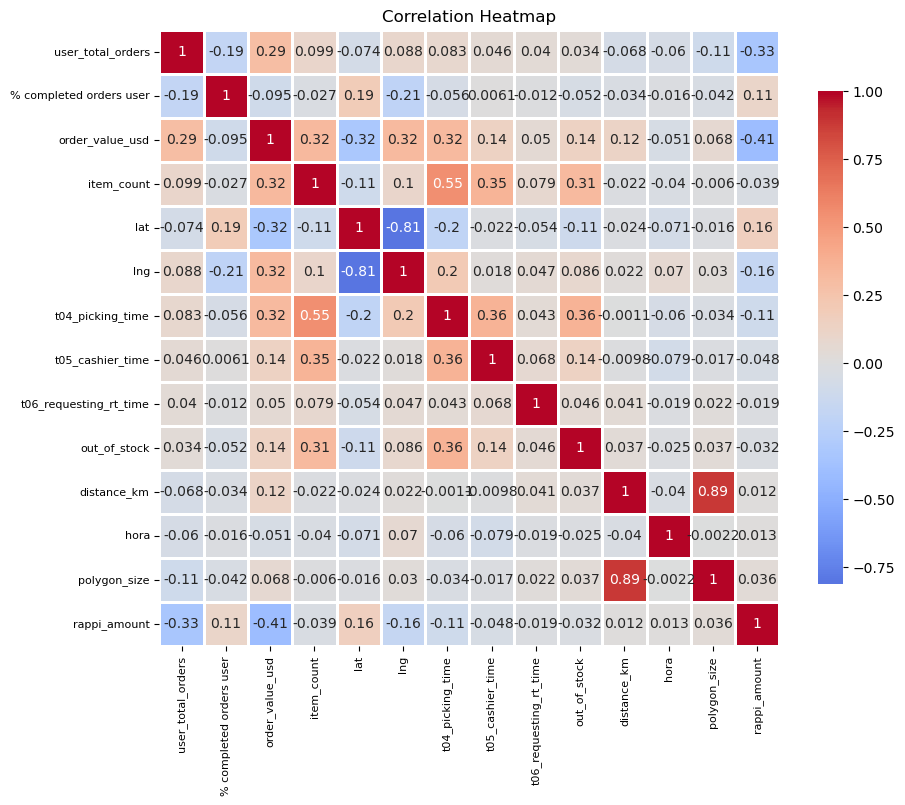

In [35]:
# Create a heatmap
plt.figure(figsize=(10, 8))
df_quan_corr = df_quan.corr(method = 'spearman' )
ax = sns.heatmap(df_quan_corr, annot=True, cmap='coolwarm', center=0,fmt='.2g',xticklabels='auto', yticklabels='auto',linewidth=.8,cbar_kws={"shrink": .8})
ax.tick_params(axis='both', which='both', labelsize=8)
plt.title("Correlation Heatmap")
plt.show()

c:\Users\equipo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


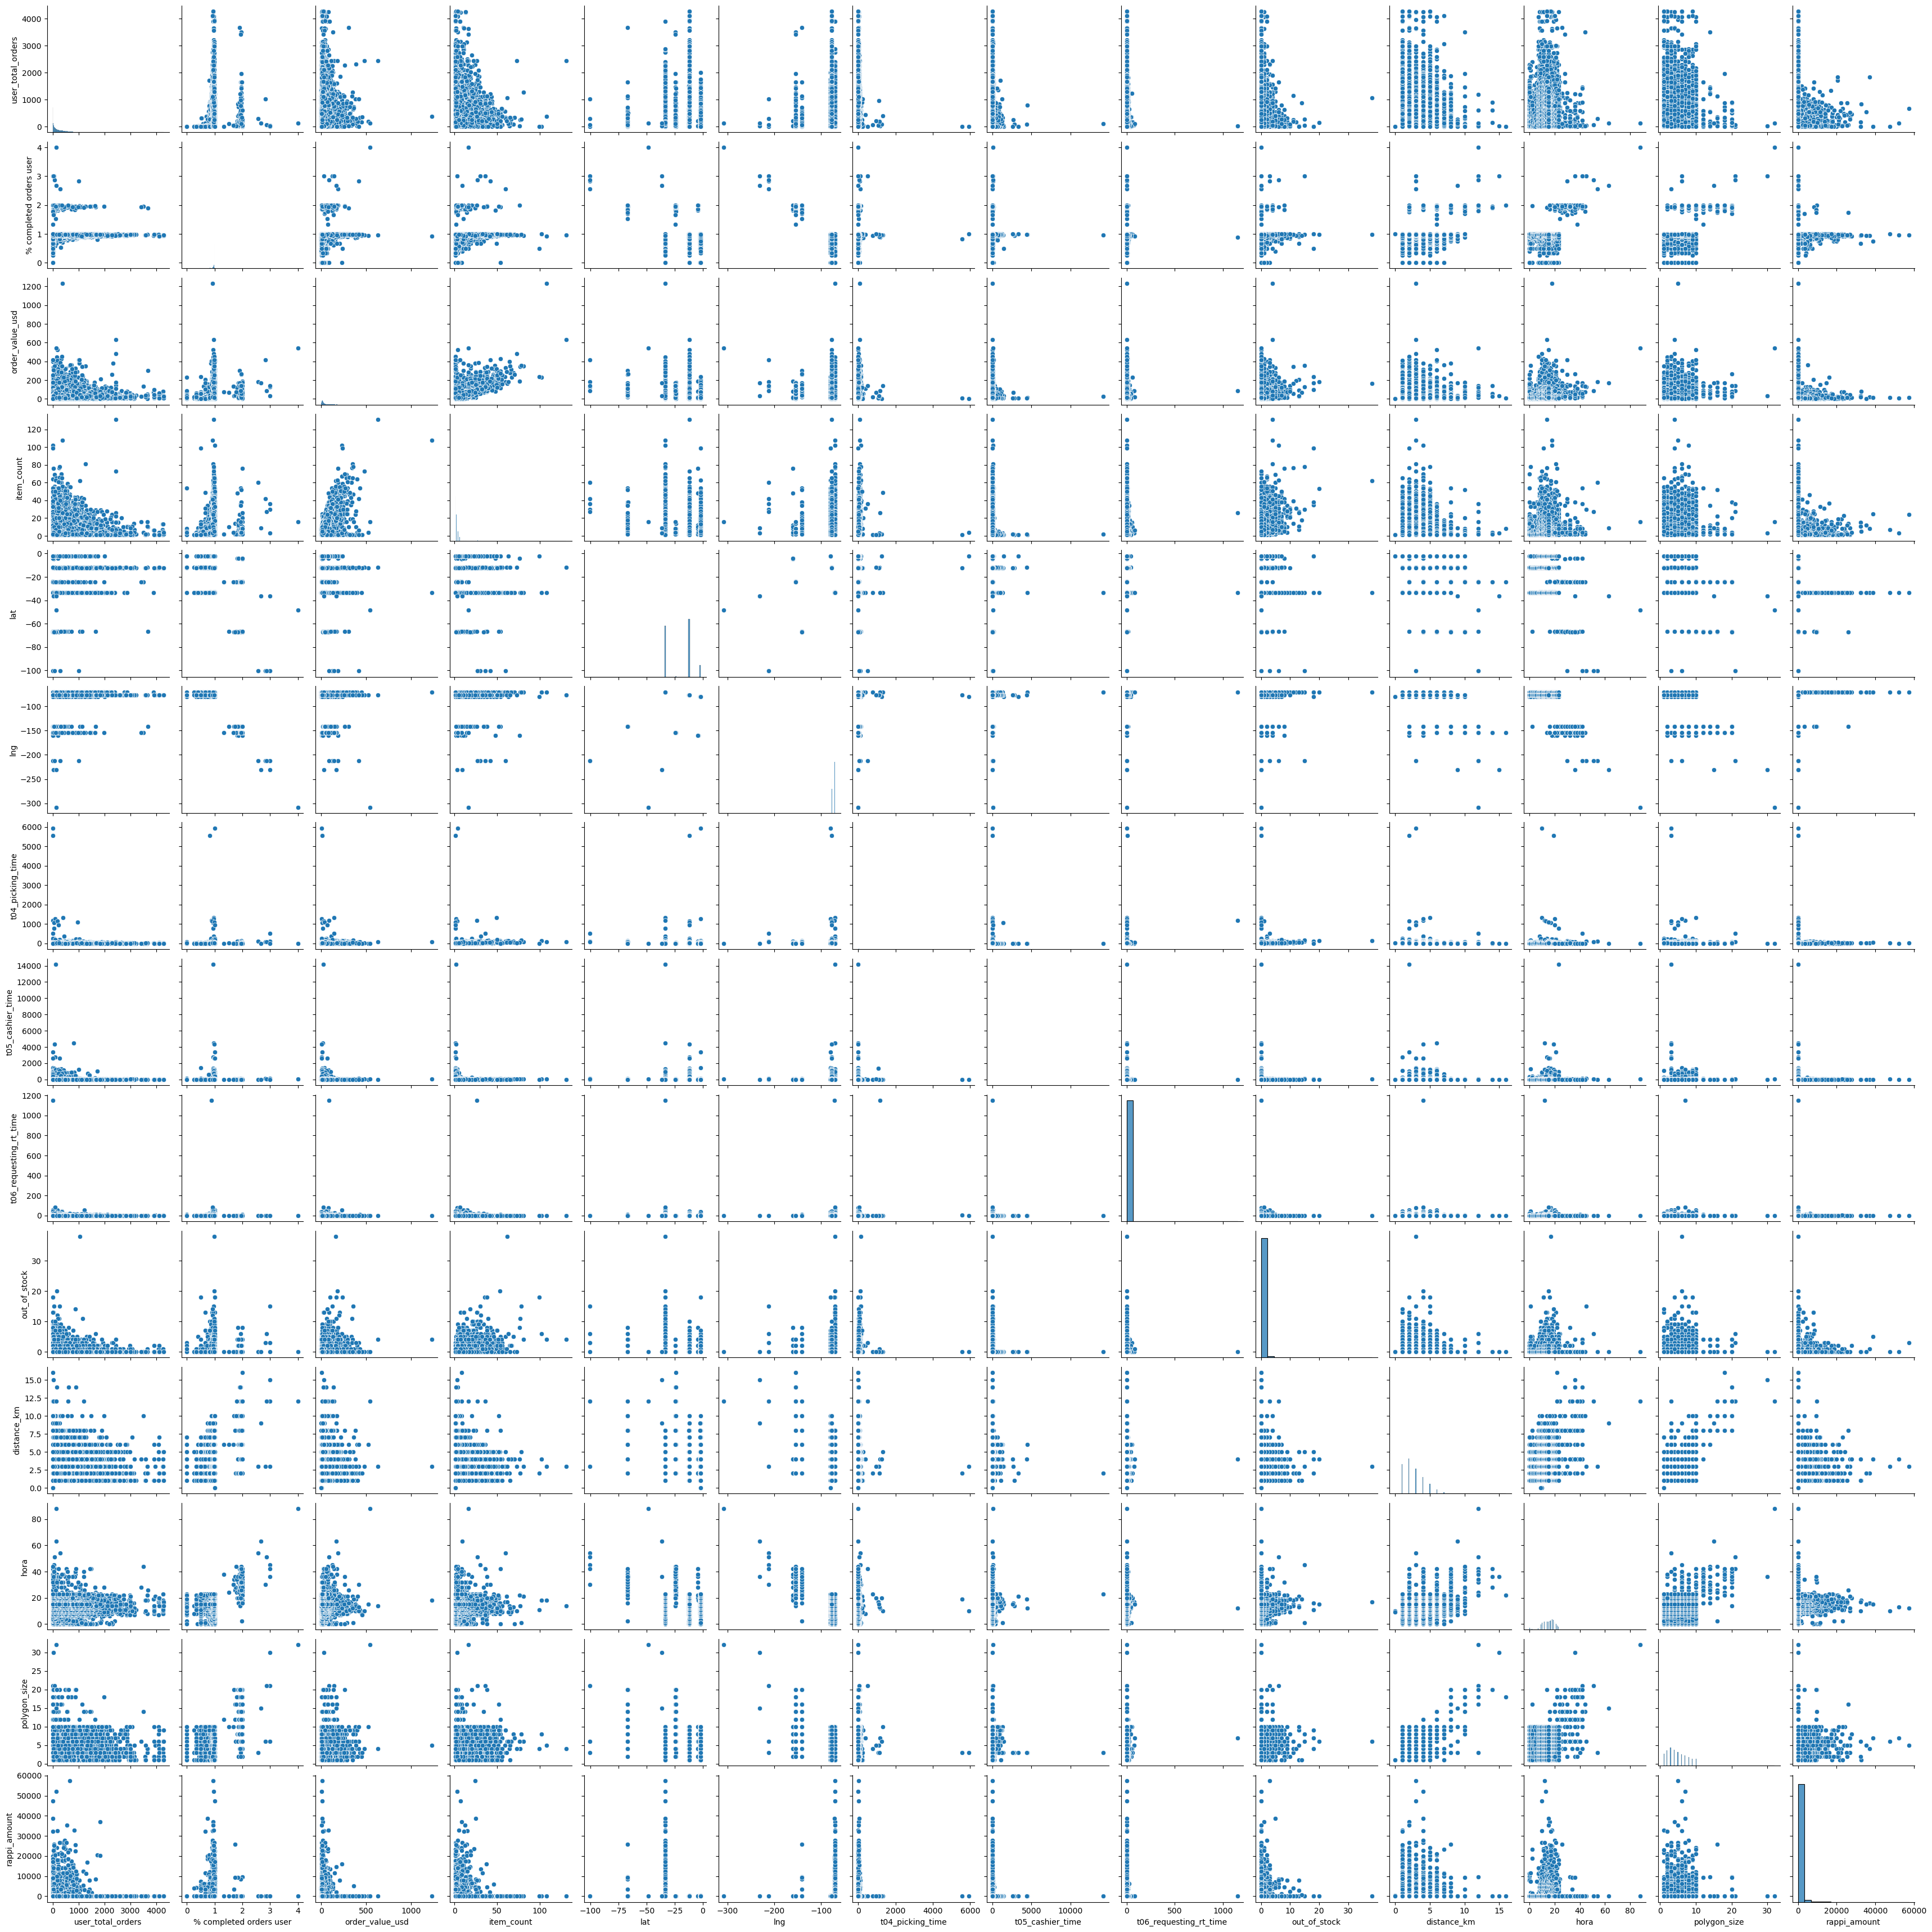

In [36]:
# Create a pairplot
sns.pairplot(df_quan)

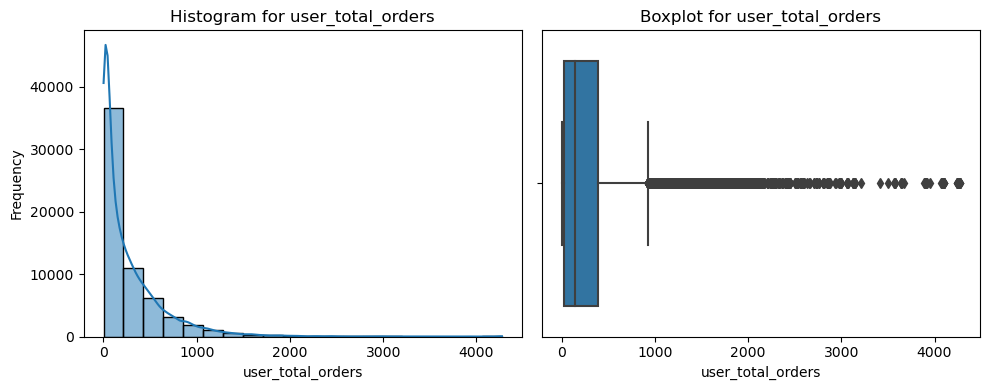

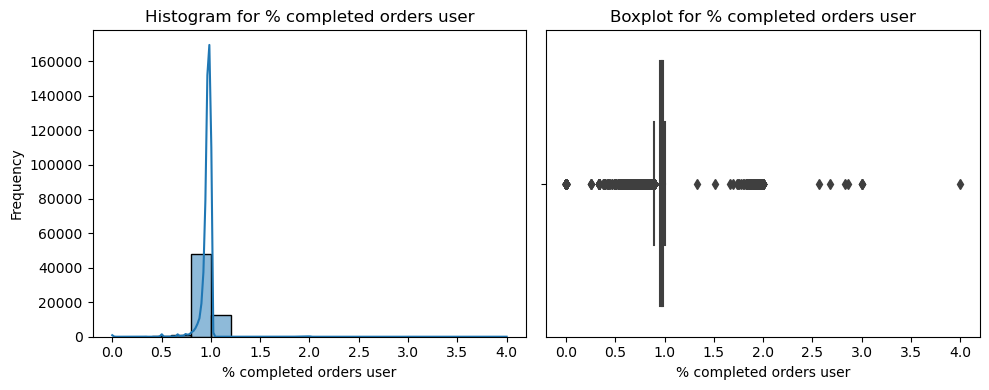

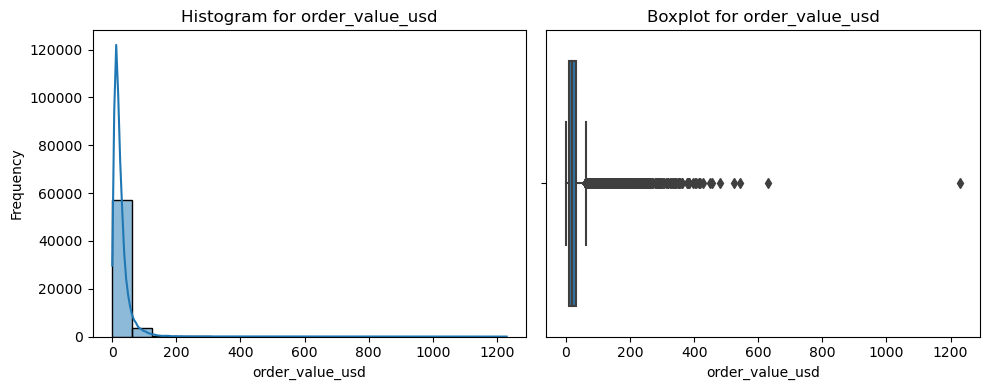

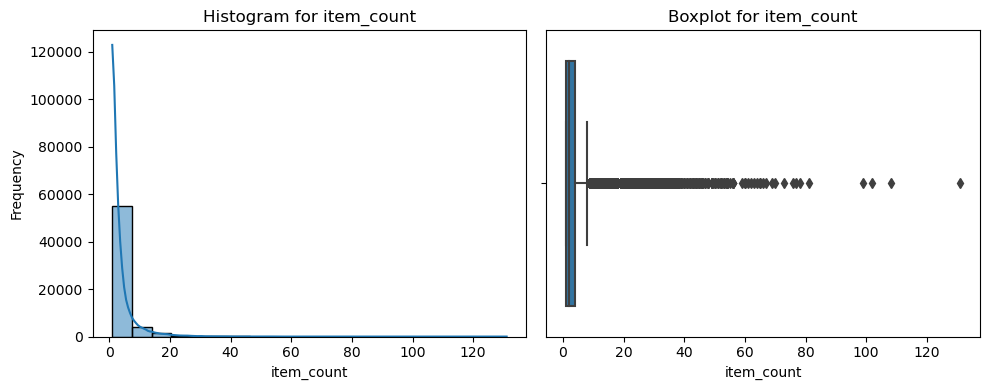

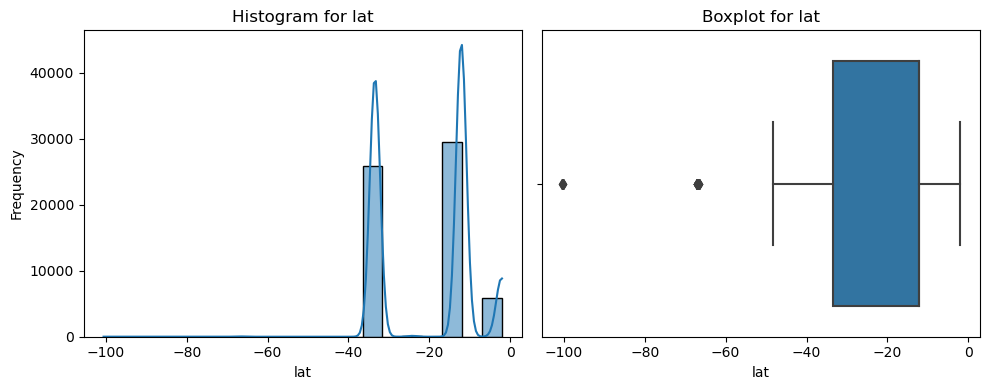

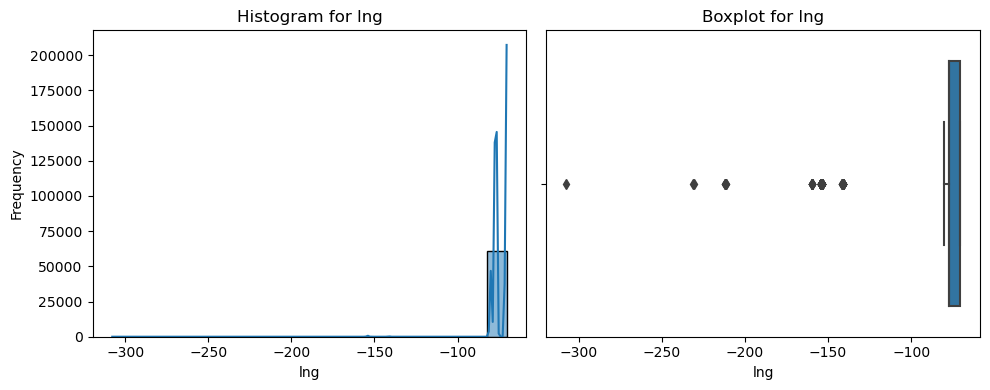

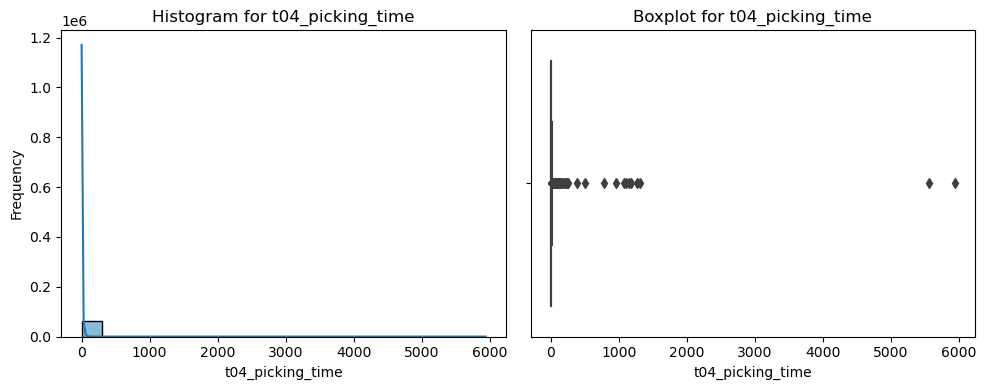

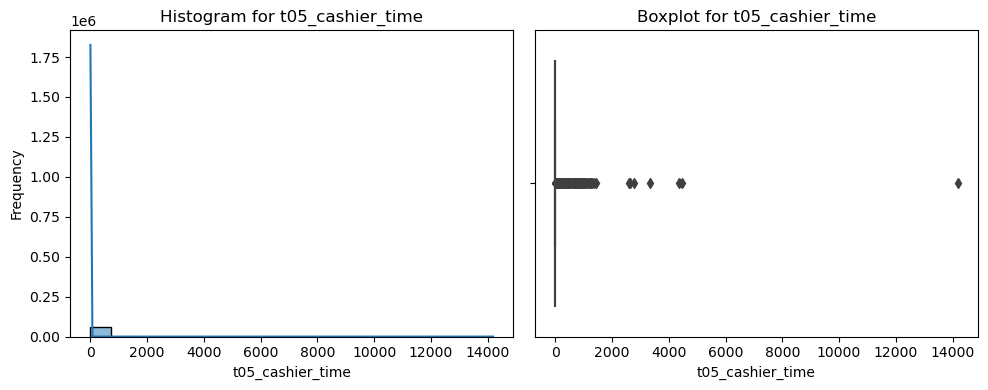

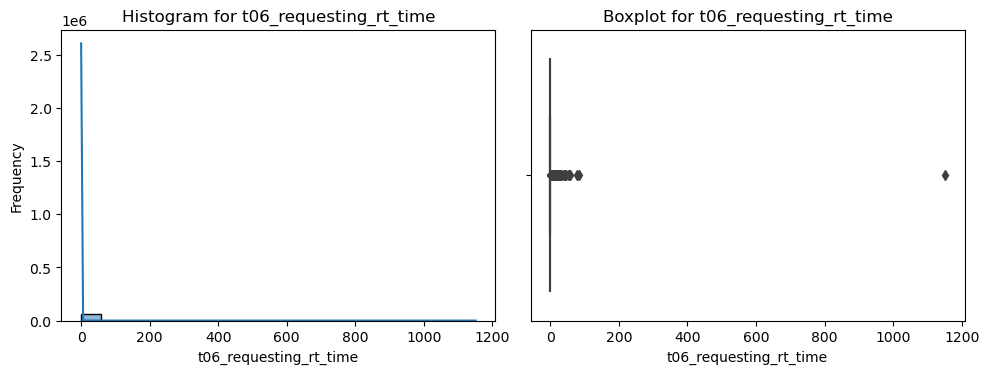

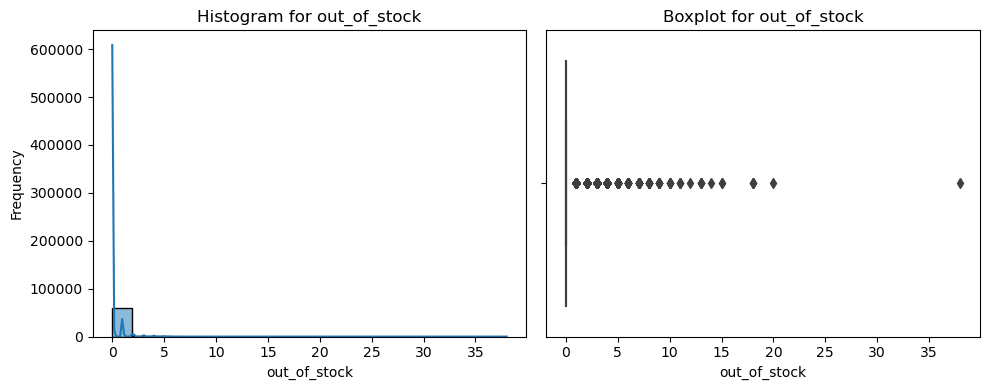

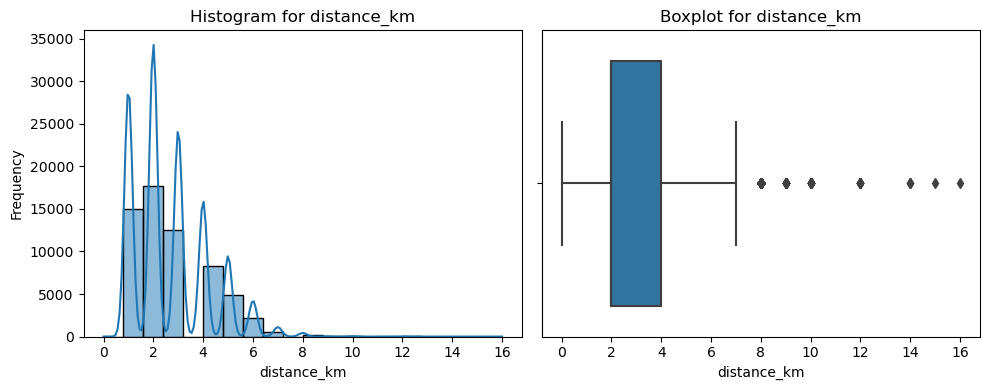

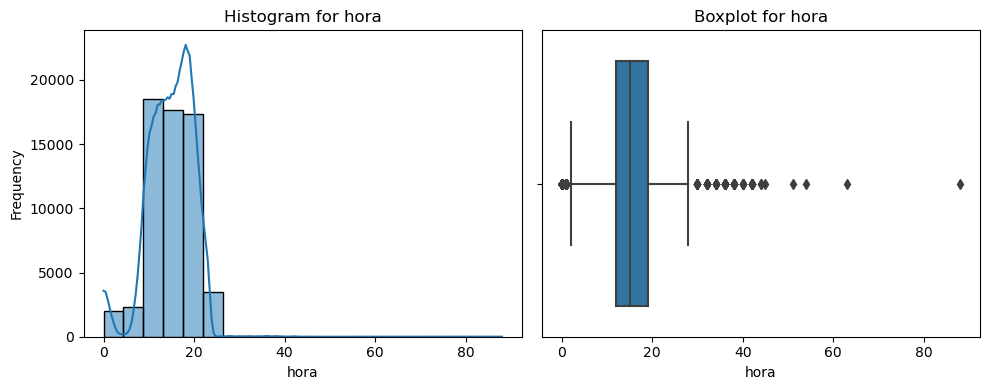

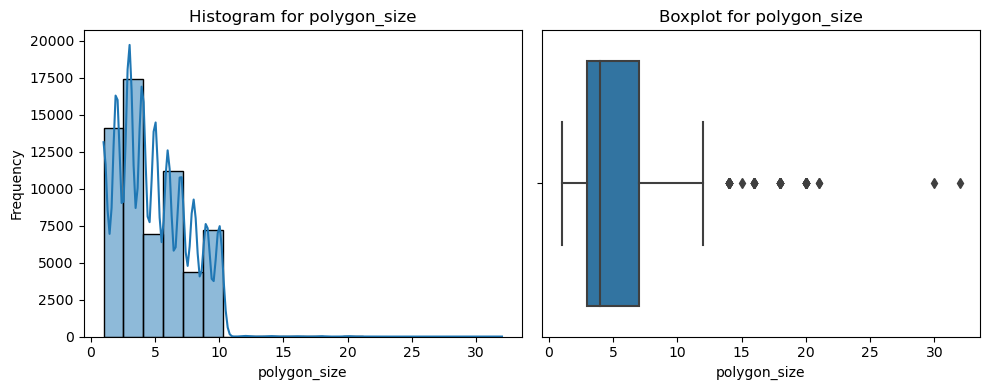

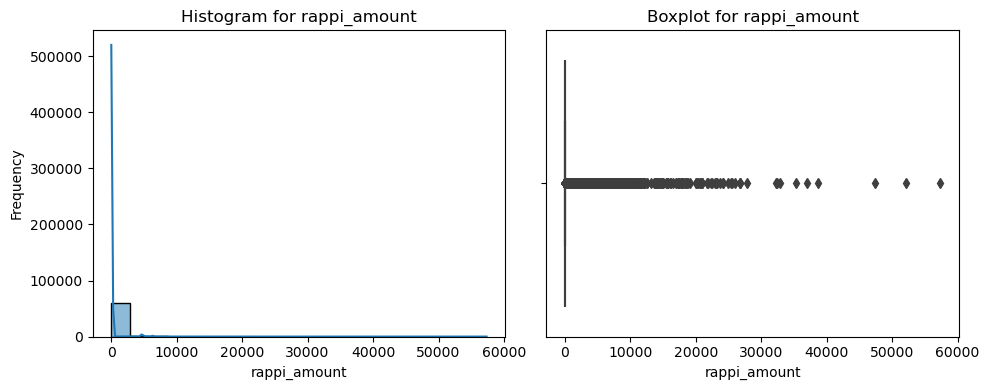

In [37]:
for col in df_quan.columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Histogram
    sns.histplot(df_quan[col], kde=True, bins=20, ax=ax[0])
    ax[0].set_title(f'Histogram for {col}')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df_quan[col], ax=ax[1])
    ax[1].set_title(f'Boxplot for {col}')
    ax[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

In [38]:
df_quan.columns

Index(['user_total_orders', '% completed orders user', 'order_value_usd',
       'item_count', 'lat', 'lng', 't04_picking_time', 't05_cashier_time',
       't06_requesting_rt_time', 'out_of_stock', 'distance_km', 'hora',
       'polygon_size', 'rappi_amount'],
      dtype='object')

In [42]:
#Removing outliers for : % completed orders user, picking_time, cashier_time, t_06, polygon size, rapi_amount
columns = ['t04_picking_time', 't05_cashier_time',
           't06_requesting_rt_time', 'polygon_size', 'rappi_amount']

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.DataFrame()
for col in columns:
    condition = (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])
    outliers = pd.concat([outliers, df[condition]], ignore_index=True)


In [43]:
#chi_squared for categorical
from scipy.stats import chi2_contingency

chi_squared_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi-Squared', 'P-Value'])

for var1 in df_cat:
    for var2 in df_cat:
        if var1 != var2:
          #if var2 =='bad_order':
            contingency_table = pd.crosstab(df[var1], df[var2])

            chi2, p, _, _ = chi2_contingency(contingency_table)


            new_row = pd.DataFrame({'Variable 1': [var1], 'Variable 2': [var2], 'Chi-Squared': [chi2], 'P-Value': [p]})

            chi_squared_results = pd.concat([chi_squared_results, new_row], ignore_index=True)

chi_squared_results


Variable 1      Variable 2    Chi-Squared       P-Value
0       country   district_name  122772.000000  0.000000e+00
1       country         weekday    6388.912578  0.000000e+00
2       country  payment_method    5699.398258  0.000000e+00
3       country            city  122772.000000  0.000000e+00
4       country     brand_group  107408.463081  0.000000e+00
..          ...             ...            ...           ...
105  use_credit     brand_group    9318.591443  0.000000e+00
106  use_credit    vehicle_type     253.875937  7.439447e-56
107  use_credit  store_category    1779.554616  0.000000e+00
108  use_credit       bad_order      44.885613  2.088870e-11
109  use_credit      tag_cancel      11.634891  6.472612e-04

[110 rows x 4 columns]

In [44]:
#Checking for independance between our outcome bad_order and the categorical variables

In [45]:
#chi_squared for categorical
from scipy.stats import chi2_contingency

chi_squared_results = pd.DataFrame(columns=['Variable', 'Chi-Squared', 'P-Value'])

outcome_variable = 'bad_order'

for var in df_cat:
        if var != outcome_variable:
            contingency_table = pd.crosstab(df[outcome_variable], df[var])

            chi2, p, _, _ = chi2_contingency(contingency_table)


            new_row = pd.DataFrame({'Variable': var, 'Chi-Squared': [chi2], 'P-Value': [p]})

            chi_squared_results = pd.concat([chi_squared_results, new_row], ignore_index=True)

            if p < 0.05:
              print(f"There is a significant association between {outcome_variable} and {var} (p-value = {p:.2f})")
            else:
              print(f"There is no significant association between {outcome_variable} and {var} (p-value = {p:.2f})")

#H0 there is no relathionship between the variables

chi_squared_results


There is a significant association between bad_order and country (p-value = 0.00)
There is a significant association between bad_order and district_name (p-value = 0.00)


There is a significant association between bad_order and weekday (p-value = 0.00)
There is a significant association between bad_order and payment_method (p-value = 0.00)
There is a significant association between bad_order and city (p-value = 0.00)
There is a significant association between bad_order and brand_group (p-value = 0.00)
There is a significant association between bad_order and vehicle_type (p-value = 0.00)
There is a significant association between bad_order and store_category (p-value = 0.00)
There is a significant association between bad_order and tag_cancel (p-value = 0.00)
There is a significant association between bad_order and use_credit (p-value = 0.00)


Variable   Chi-Squared        P-Value
0         country    407.663958   2.998446e-89
1   district_name   1486.157670  2.944797e-235
2         weekday    185.120500   2.772021e-37
3  payment_method    884.045564  1.693564e-184
4            city    407.663958   2.998446e-89
5     brand_group   2991.690427  4.625567e-171
6    vehicle_type    290.719774   7.430245e-64
7  store_category    338.667335   4.177425e-70
8      tag_cancel  17560.336627   0.000000e+00
9      use_credit     44.885613   2.088870e-11

In [46]:
#Perfoming ANOVA TEST for mixed categorical and numerical values

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# List of numerical variables for the ANOVA tests
df_cuantitative = ['% completed orders user', 'order_value_usd', 'item_count', 't04_picking_time', 't05_cashier_time', 't06_requesting_rt_time', 'out_of_stock', 'distance_km', 'hora']

# Perform ANOVA for numerical variables
for num_var in df_cuantitative:
    formula = f'{num_var} ~ C(bad_order)'
    try:
        model = ols(formula, data=df).fit()
        anova_table = anova_lm(model)
        print(f"ANOVA table for {num_var} and bad_order:")
        print(anova_table)

        p_value = anova_table['PR(>F)'][0]
        if p_value < 0.05:
            print(f"There is a significant difference between the means of the groups defined by bad_order for {num_var} (p-value = {p_value:.2f})")
        else:
            print(f"There is no difference between the means of k groups")

        print("=" * 40)

    except Exception as e:
        print(f"Error for {num_var} and bad_order: {str(e)}")



Error for % completed orders user and bad_order: 
ANOVA table for order_value_usd and bad_order:
                   df        sum_sq        mean_sq           F        PR(>F)
C(bad_order)      1.0  1.405410e+05  140540.961743  199.088314  3.885452e-45
Residual      61384.0  4.333236e+07     705.922709         NaN           NaN
There is a significant difference between the means of the groups defined by bad_order for order_value_usd (p-value = 0.00)
ANOVA table for item_count and bad_order:
                   df        sum_sq       mean_sq           F         PR(>F)
C(bad_order)      1.0  1.773998e+04  17739.983216  816.342056  2.240246e-178
Residual      61384.0  1.333940e+06     21.731066         NaN            NaN
There is a significant difference between the means of the groups defined by bad_order for item_count (p-value = 0.00)
ANOVA table for t04_picking_time and bad_order:
                   df        sum_sq        mean_sq           F        PR(>F)
C(bad_order)      1.0  2.272759

#

# 4. Machine Learning


In [48]:
# Feature engineering
df_quan

user_total_orders  % completed orders user  order_value_usd  \
0                    111                   0.9550        25.407407   
1                      4                   0.5000        43.049383   
2                    208                   0.9904       119.438889   
4                    455                   0.9692        36.740741   
6                      9                   0.0000        20.835802   
...                  ...                      ...              ...   
62377                  2                   1.0000         3.852632   
62378                480                   0.9813         7.550000   
62379                160                   0.9750        14.089474   
62380               1116                   0.9238        22.402632   
62381                248                   0.9798        11.697368   

       item_count        lat        lng  t04_picking_time  t05_cashier_time  \
0             2.0 -33.433491 -70.581792               0.0           14187.0   
1             1.0 -33.403637 -70.657823               2.0               0.0   
2            11.0 -33.402225 -70.598952               8.0              12.0   
4             3.0 -33.449619 -70.635816               0.0               0.0   
6             6.0 -33.371366 -70.513265              16.0               5.0   
...           ...        ...        ...               ...               ...   
62377         2.0 -12.068502 -77.115290               0.0               1.0   
62378         3.0 -12.109637 -77.046844               0.0               3.0   
62379         1.0 -12.115765 -77.043421               7.0               0.0   
62380         3.0 -12.115089 -76.986207              10.0               6.0   
62381         5.0 -12.115012 -77.045736               5.0               3.0   

       t06_requesting_rt_time  out_of_stock  distance_km  hora  polygon_size  \
0                         0.0             0          2.0    23           3.0   
1                         0.0             0          3.0     0           3.0   
2                         1.0             0          4.0    12           3.0   
4                         0.0             0          4.0    13           3.0   
6                         0.0             0          1.0    19           3.0   
...                       ...           ...          ...   ...           ...   
62377                     0.0             0          3.0    15           6.0   
62378                     0.0             0          3.0    15           8.0   
62379                     0.0             0          2.0    15           2.0   
62380                     0.0             0          1.0    15           2.0   
62381                     0.0             0          1.0    15           1.0   

       rappi_amount  
0               0.0  
1               0.0  
2               0.0  
4               0.0  
6               0.0  
...             ...  
62377           0.0  
62378           0.0  
62379           0.0  
62380           0.0  
62381           0.0  

[61386 rows x 14 columns]

For this part we are going to start put the data in a standarization and onehot encoding so the data is ready to be inserted in the modeling. For it, we are going to use the Pipeline method

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class VariableSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X , y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

In [50]:
columns_quan = list(df_quan.columns)

In [51]:
columns_quan


['user_total_orders',
 '% completed orders user',
 'order_value_usd',
 'item_count',
 'lat',
 'lng',
 't04_picking_time',
 't05_cashier_time',
 't06_requesting_rt_time',
 'out_of_stock',
 'distance_km',
 'hora',
 'polygon_size',
 'rappi_amount']

In [52]:
#quantitative
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

quanti_pipeline = Pipeline(
    [
     ('selector', VariableSelector(columns_quan)),
     ('std_scaler', StandardScaler())
    ]
    )



In [53]:
#It is being checked in the case of the categorical variables, which values can be apprved for a OHE method or label encoding

df_cat_oh = ['country','payment_method','city','vehicle_type','store_category','use_credit']
df_cat_le = ['district_name','brand_group']



In [54]:
from sklearn.preprocessing import OneHotEncoder as OHE

cuali_pipeline_ohe = Pipeline(

  [
    ('selector',VariableSelector(df_cat_oh)),
    ('OHE_columns',OHE(sparse=False))

  ]

)

In [55]:
from sklearn.preprocessing import OrdinalEncoder as OE

cuali_pipeline_le =Pipeline(

                            [
                             ('selector',VariableSelector(df_cat_le)),
                             ('LE_columns', OE())
                            ]

)

In [56]:
from sklearn.pipeline import FeatureUnion

full_pipeline =FeatureUnion(
    transformer_list=[
        ('num_pipeline', quanti_pipeline),
        ('ohe_pipeline',cuali_pipeline_ohe),
        ('le_pipeline',cuali_pipeline_le)
                      ]
)

Once that is defined the Pipeline, to do the adjustements on the data. It is going to be retrieved from the main dataset the y to be predicted


In [57]:
x_df = full_pipeline.fit_transform(df)


c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
X = x_df
y = df['bad_order']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42,shuffle=True,stratify = y)

Now that we splited our data, we will apply 3 models on our categorical outcome (Logistic regression, Classification Tree, Random Forest)

+ LOGISTICS REGRESSION

In [60]:
#Logistic Regression Model Fitting

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = None, solver = 'newton-cholesky')
logreg.fit(X_train, y_train)

#Predicting the test set results
lr_pred = logreg.predict(X_test)

c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.02605e-26): result may not be accurate.
  warnings.warn(


c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [61]:
#Calculating the accuracy
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.92


In [62]:
#Checking crossvalidated performance
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(logreg, X_test, y_test)
print(f"average cross validated score : {np.mean(cv_score)}")

c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=6.96063e-26): result may not be accurate.
  warnings.warn(


c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newto

average cross validated score : 0.9179833086767017


c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


              precision    recall  f1-score   support

       False       0.92      1.00      0.96     11255
        True       0.60      0.06      0.11      1023

    accuracy                           0.92     12278
   macro avg       0.76      0.53      0.53     12278
weighted avg       0.89      0.92      0.89     12278



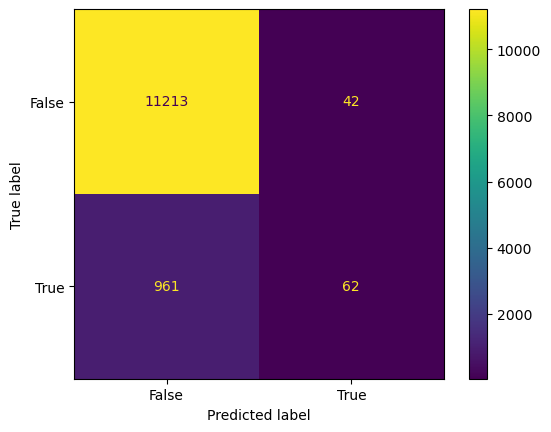

In [63]:
#Logistic Regression model performance with Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
confusion_matrix_lr = confusion_matrix(y_test, lr_pred, labels= logreg.classes_)
ConfusionMatrixDisplay(confusion_matrix_lr, display_labels = logreg.classes_).plot()
print(classification_report(y_test,lr_pred))

In [64]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,roc_auc_score,cohen_kappa_score,roc_curve
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
sensitivity_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)

#ROC Curve
lr_pred_prob= logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob[:,1])
lr_roc_auc = roc_auc_score(y_test, lr_pred_prob[:,1])


result_lr = pd.DataFrame([['Log. reg.',accuracy_lr, precision_lr, sensitivity_lr,f1_lr,lr_roc_auc]], columns=('model','accuracy','precision','sensitivity','f1','roc'))
result_lr

model  accuracy  precision  sensitivity        f1       roc
0  Log. reg.  0.918309   0.596154     0.060606  0.110027  0.730231

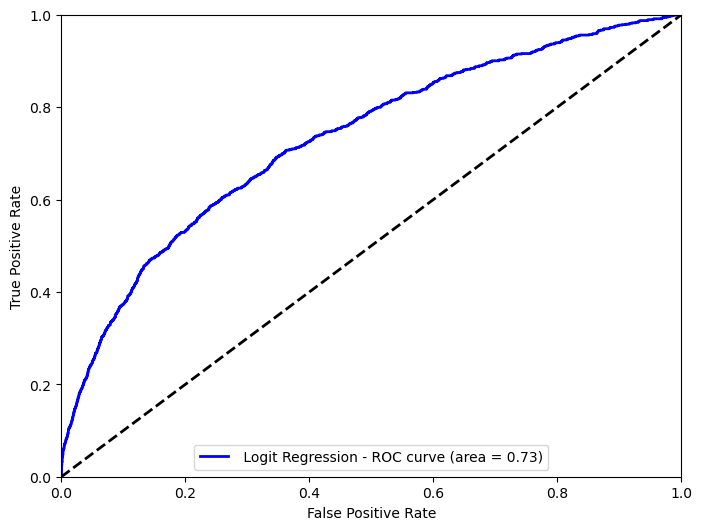

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=' Logit Regression - ROC curve (area = {:.2f})'.format(lr_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center')
plt.show()

+ Decision Tree

In [66]:
#Classification Tree Model Fitting

from sklearn.tree import DecisionTreeClassifier
# Initializing Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predicting on the test set
clf_pred = clf.predict(X_test)

In [67]:
#Calculating the model accuracy, how often is the classifier correct ?
from sklearn.metrics import accuracy_score

print("Accuracy Decision Tree Classifier: {:.2f}".format(accuracy_score(y_test, clf_pred)))


Accuracy Decision Tree Classifier: 0.87


              precision    recall  f1-score   support

       False       0.94      0.92      0.93     11255
        True       0.27      0.31      0.29      1023

    accuracy                           0.87     12278
   macro avg       0.60      0.62      0.61     12278
weighted avg       0.88      0.87      0.88     12278



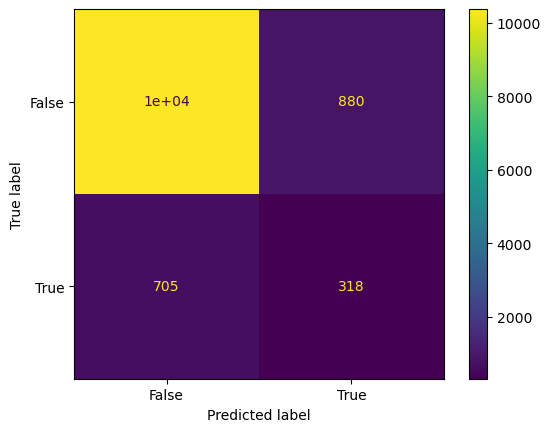

In [68]:
#Classification Tree Model performance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
confusion_matrix_clf = confusion_matrix(y_test, clf_pred, labels = clf.classes_)
ConfusionMatrixDisplay(confusion_matrix_clf, display_labels= clf.classes_).plot()
print(classification_report(y_test, clf_pred))

In [69]:
from sklearn.tree import export_graphviz

export_graphviz(
 clf,
 out_file=("order_simple.dot"),
 feature_names=None,
 class_names=None,
 filled=True,
)

In [70]:
!dot -Tpng hitters_simple.dot -o hitters_simple.png

"dot" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [72]:
#from IPython.display import Image
#Image("order_simple.png")

In [73]:
accuracy_clf = accuracy_score(y_test, clf_pred)
precision_clf = precision_score(y_test, clf_pred)
sensitivity_clf = recall_score(y_test, clf_pred)
f1_clf = f1_score(y_test, clf_pred)


#ROC Curve
clf_pred_prob= clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, clf_pred_prob[:,1])
clf_roc_auc = roc_auc_score(y_test, clf_pred_prob[:,1])


result_clf = pd.DataFrame([['decision tree',accuracy_clf, precision_clf, sensitivity_clf,f1_clf,clf_roc_auc]], columns=('model','accuracy','precision','sensitivity','f1','roc'))
result_clf

model  accuracy  precision  sensitivity        f1       roc
0  decision tree  0.870907   0.265442      0.31085  0.286357  0.616331

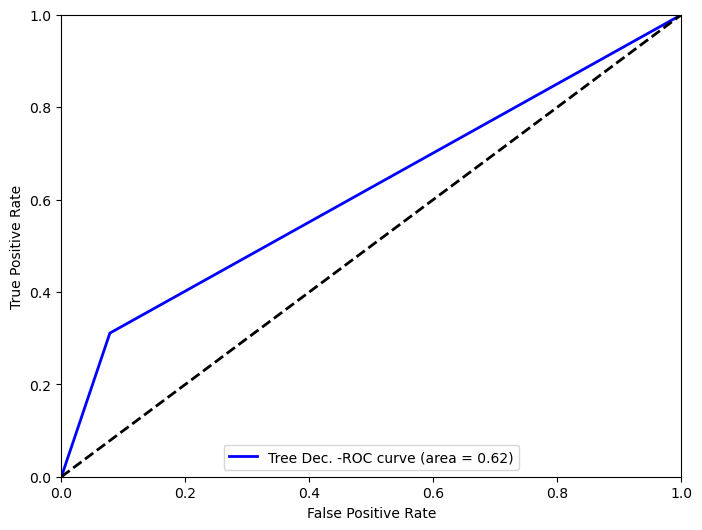

In [74]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Tree Dec. -ROC curve (area = {:.2f})'.format(clf_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center')
plt.show()

+ Random Forest

In [75]:
#Random Forest Model Fitting

from sklearn.ensemble import RandomForestClassifier
# Initializing Random Forest Classifer object
rf = RandomForestClassifier()

# Train Random Forest Classifer
rf.fit(X_train, y_train)

#Predicting on the test set
rf_pred = rf.predict(X_test)

In [76]:
#Calculating Random Forest model accuracy
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy Random Forest Classifier: {:.2f}".format(accuracy_rf))

Accuracy Random Forest Classifier: 0.93


              precision    recall  f1-score   support

       False       0.93      1.00      0.96     11255
        True       0.89      0.16      0.27      1023

    accuracy                           0.93     12278
   macro avg       0.91      0.58      0.62     12278
weighted avg       0.93      0.93      0.91     12278



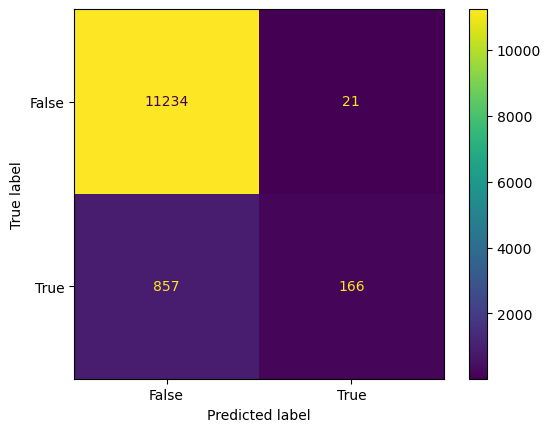

In [77]:
#Random Forest Classifier model performance
confusion_matrix_rf = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
ConfusionMatrixDisplay(confusion_matrix_rf, display_labels= rf.classes_).plot()
print(classification_report(y_test, rf_pred))

In [78]:
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
sensitivity_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)


#ROC Curve
rf_pred_prob= rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob[:,1])
rf_roc_auc = roc_auc_score(y_test, rf_pred_prob[:,1])

result_rf = pd.DataFrame([['random forest',accuracy_rf, precision_rf, sensitivity_rf,f1_rf,rf_roc_auc]], columns=('model','accuracy','precision','sensitivity','f1','roc'))
result_rf

model  accuracy  precision  sensitivity       f1       roc
0  random forest   0.92849   0.887701     0.162268  0.27438  0.771022


After checking model performance accuracy (counts of correct classification) we can assume that our best model is Random Forest Classifier with 0.93% of correctly predicted predictions




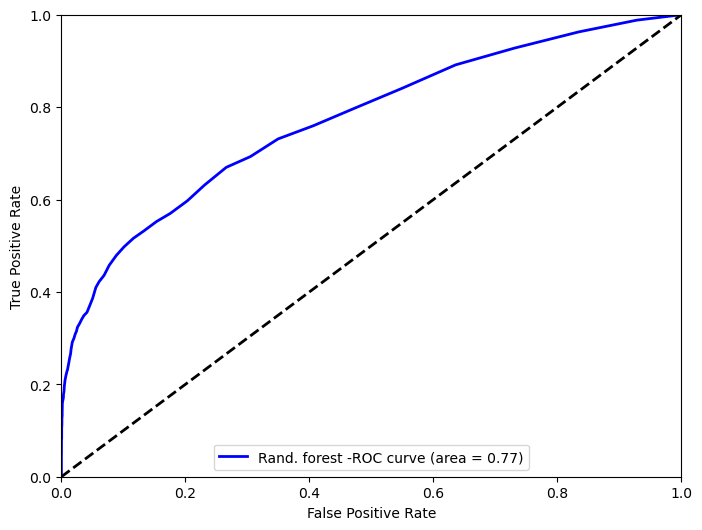

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Rand. forest -ROC curve (area = {:.2f})'.format(rf_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center')
plt.show()

In [80]:
resultados = pd.concat([result_lr, result_clf,result_rf], axis=0)
resultados

model  accuracy  precision  sensitivity        f1       roc
0      Log. reg.  0.918309   0.596154     0.060606  0.110027  0.730231
0  decision tree  0.870907   0.265442     0.310850  0.286357  0.616331
0  random forest  0.928490   0.887701     0.162268  0.274380  0.771022

Results:


> Metrics

+ Overall the accuracy between all the models seems to be high (between 86 and 92%) which meant that the models have been a great deal into predicting if the order was labeled as a good one or bad one.
+ Precision: However, for this exercise it is most interesting to predict only the bad orders, to which this metric is most important. As it can be revised, the random forest model is the one with the best result out of the three. Which means that of the total predicted true bad orders, the model have an 86% of good prediction

+ Sensitivity: However, all the models had a bad ratio in this metric. This metric indicates that the of all the True orders labeled as bad order, only ;in the best case; was predicted 30% of this cases. To make the model more fit, it will be used the methods for reduce the overfitting of the models.


# Tuning model

In [81]:


estimators = list(range(2, 50, 5))
sens_rf_num_estimators = []
accu_rf_num_estimators = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    sensitivity_rf = recall_score(y_test, rf_pred)
    accuracy_rf = accuracy_score(y_test, rf_pred)

    sens_rf_num_estimators.append(sensitivity_rf)
    accu_rf_num_estimators.append(accuracy_rf)


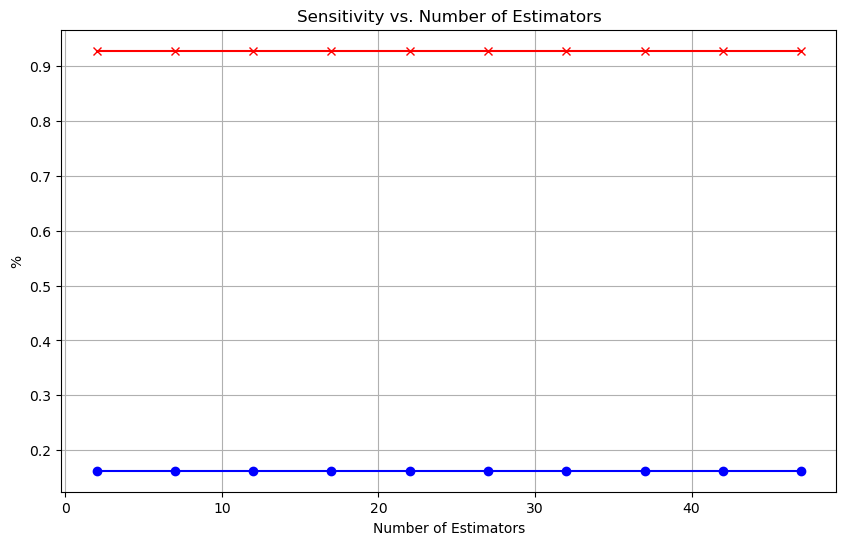

In [82]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(estimators, sens_rf_num_estimators, marker='o', linestyle='-', color='b')
plt.plot(estimators,accu_rf_num_estimators, marker='x', linestyle='-', color='r')
plt.title('Sensitivity vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('%')
plt.grid(True)
plt.show()

In [83]:

train_scores = []
valid_scores = []
leaves = list(range(2,30))
for leaf in leaves :
    dtr = RandomForestClassifier(min_samples_leaf = leaf)
    dtr.fit(X_train, y_train)
    train_scores.append(dtr.score(X_train, y_train))
    valid_scores.append(dtr.score(X_test, y_test))

plt.figure(figsize=(10,8))
plt.plot(leaves, train_scores)
plt.plot(leaves, valid_scores)
plt.xlabel("minimum samples per leaf")
plt.ylabel("score values")
plt.legend(["training scores", "validation scores"])
plt.show()

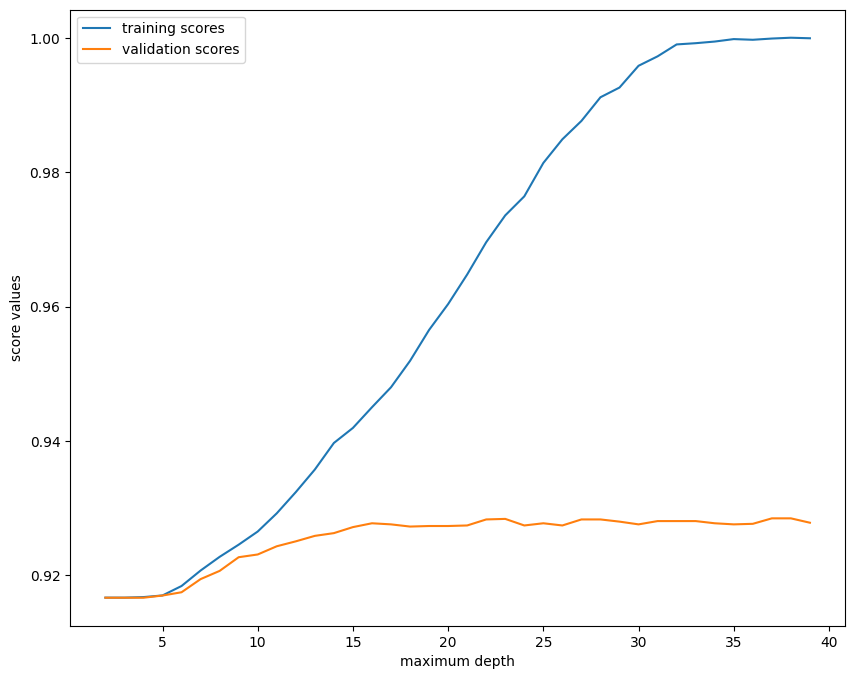

In [ ]:
train_scores = []
valid_scores = []
depths = list(range(2,40))
for depth in depths :
    dtr = RandomForestClassifier(max_depth = depth)
    dtr.fit(X_train, y_train)
    train_scores.append(dtr.score(X_train, y_train))
    valid_scores.append(dtr.score(X_test, y_test))

plt.figure(figsize=(10,8))
plt.plot(depths, train_scores)
plt.plot(depths, valid_scores)
plt.xlabel("maximum depth")
plt.ylabel("score values")
plt.legend(["training scores", "validation scores"])
plt.show()

+ GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2, 15)), 'min_samples_leaf': list(range(2,20))}

grid_search_cv = GridSearchCV(RandomForestClassifier(),
                              params,
                              verbose=1,
                              cv=3,
                              n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 234 candidates, totalling 702 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=1)

In [ ]:

best_tree_model = grid_search_cv.best_estimator_
best_tree_model

RandomForestClassifier(max_depth=14, min_samples_leaf=2)

In [ ]:
best_tree_model.fit(X_train,y_train)
best_tree_model.score(X_test,y_test)

0.9262094803713959

In [ ]:
rfo_pred = best_tree_model.predict(X_test)

In [ ]:
from sklearn.tree import export_graphviz
tree_to_visualize = best_tree_model.estimators_[0]



In [ ]:
from sklearn.tree import export_graphviz
import subprocess

export_graphviz(
    tree_to_visualize,
    out_file="optimal_tree.dot",
    feature_names=None,
    class_names=None,
    filled=True
)


subprocess.call(['dot', '-Tpng', 'optimal_tree.dot', '-o', 'optimal_tree.png'])


0

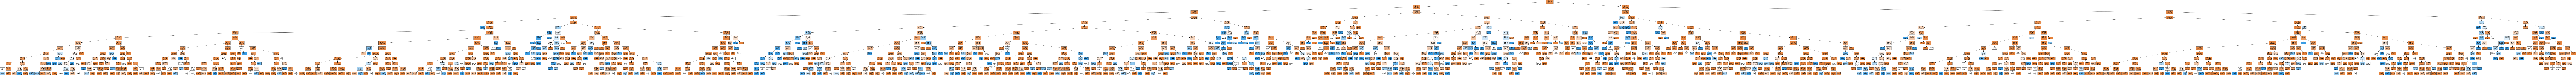

In [ ]:
from IPython.display import Image

Image("optimal_tree.png")

In [ ]:
accuracy_rfo = accuracy_score(y_test, rfo_pred)
precision_rfo = precision_score(y_test, rfo_pred)
sensitivity_rfo = recall_score(y_test, rfo_pred)
f1_rfo = f1_score(y_test, rfo_pred)


#ROC Curve
rfo_pred_prob= clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, rfo_pred_prob[:,1])
rfo_roc_auc = roc_auc_score(y_test, rfo_pred_prob[:,1])

result_rfo = pd.DataFrame([['optimal random forest',accuracy_rfo, precision_rfo, sensitivity_rfo,f1_rfo,rfo_roc_auc]], columns=('model','accuracy','precision','sensitivity','f1','roc'))
result_rfo

model  accuracy  precision  sensitivity        f1       roc
0  optimal random forest  0.926209   0.927007     0.124145  0.218966  0.619175

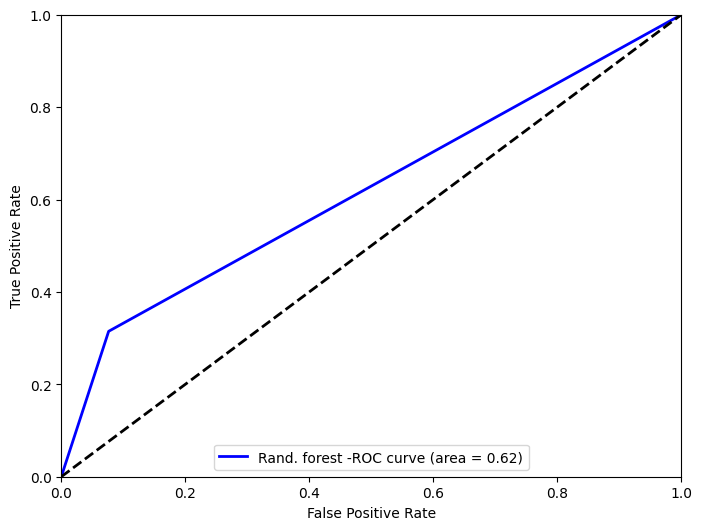

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Rand. forest -ROC curve (area = {:.2f})'.format(rfo_roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower center')
plt.show()

# Unsupervised Learning

In [ ]:
'''Importing the needed libraries and getting a basic idea on the df_quant to see what we are looking at'''
try:
    from fanalysis.pca import PCA
except:
    !pip install fanalysis
    from fanalysis.pca import PCA
display(df[df_quan].head(3))
display(df[df_quan].info())
D = df[df_quan]
p = D.shape[1]
n = D.shape[0]
D = df[df_quan]
X = D.values

In [ ]:
'''Step 1: Try PCA to reduce dimensionality'''
# instantiate acp object form PCA class
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns) #std_unit=True, doing standardized PCA)

# run PCA on X observed data
try:
    acp.fit(X)  # This will raise a ZeroDivisionError
except Exception as e:
    display(f"An error occurred: {e}")

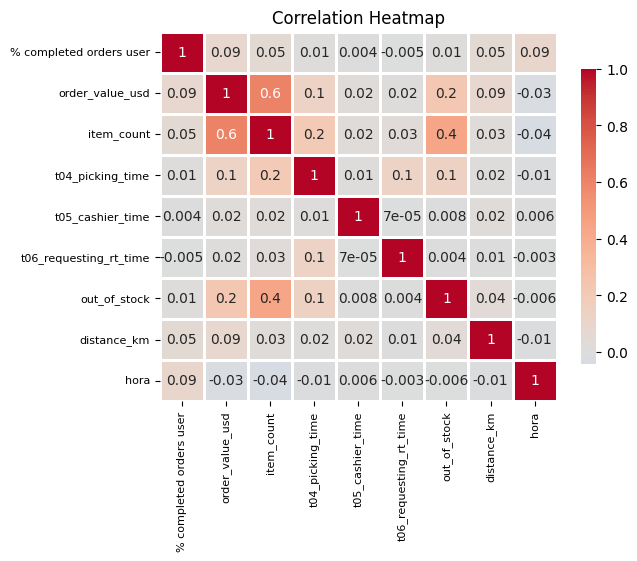

In [ ]:
'''Step 2: Trouble shooting the error, which may indicate that there are columns that are zero'''
D_corr = D.corr()
ax = sns.heatmap(D_corr, annot=True, cmap='coolwarm', center=0,fmt='.1g',xticklabels='auto', yticklabels='auto',linewidth=.8,cbar_kws={"shrink": .8})
ax.tick_params(axis='both', which='both', labelsize=8)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
'''
Step 3: Issue becomes clear that the 't06_requesting_rt_time' is the problematic one because apparently
after data cleaning, all the values we kept are zero, which makes sense given the value means the time it took for
a delivery personnel to be assigned to the order, which is expected to be swifty in any delivery app.

Solution here: get rid off such column and do it again
'''
display(D.columns[5])
D1 = D.drop(columns = [D.columns[5]])
X1 = D1.values
p1 = D1.shape[1]
n1 = D1.shape[0]
acp = PCA(std_unit=True,row_labels=D1.index,col_labels=D1.columns) #std_unit=True, doing standardized PCA)
acp.fit(X1)  # This will raise a ZeroDivisionError
display(acp.col_labels)
display(acp.eig_) # each lamda k is in the first array, and then each lamda k divided by the sum of lamda k
#(proportion of variance explained by k),
# aka the variance explained by each component, is in the second row.
# The third row is the cumulative variance.
'''Looking at the cumulative variance, the most variable with the most variance only took 22%
of the total variance in the quantitative columns'''
display(acp.eig_.shape)

't06_requesting_rt_time'

Index(['% completed orders user', 'order_value_usd', 'item_count',
       't04_picking_time', 't05_cashier_time', 'out_of_stock', 'distance_km',
       'hora'],
      dtype='object')

array([[  1.96880489,   1.10347766,   1.01689747,   0.99026089,
          0.92248382,   0.88882309,   0.76506865,   0.34418354],
       [ 24.61006111,  13.79347077,  12.71121842,  12.3782611 ,
         11.53104773,  11.11028857,   9.56335806,   4.30229424],
       [ 24.61006111,  38.40353188,  51.1147503 ,  63.4930114 ,
         75.02405914,  86.1343477 ,  95.69770576, 100.        ]])

(3, 8)

'According to the plot, I decided to choose 4 as the threshold'

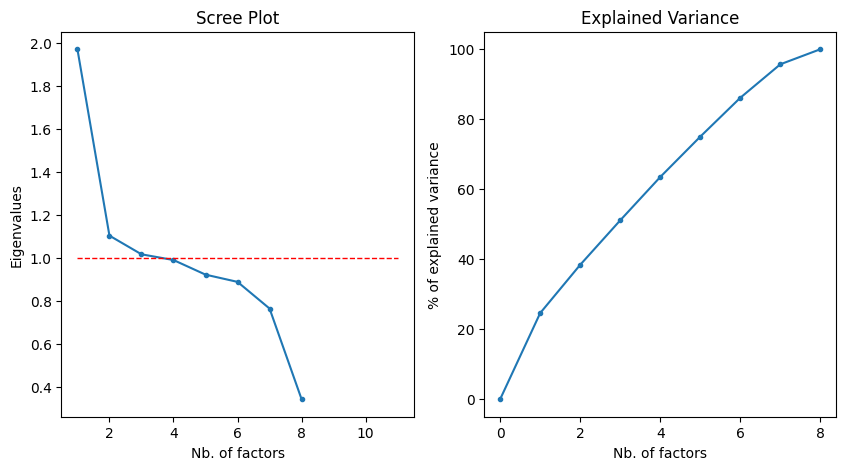

In [ ]:
'''Step 4: determining the threshold'''

# first the main plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(range(1,p1+1),acp.eig_[0],".-")
ax[0].set_xlabel("Nb. of factors")
ax[0].set_ylabel("Eigenvalues")
ax[0].set_title("Scree Plot")

# add Kaiser's threshold line
ax[0].plot([1,p1+3],[1,1],"r--",linewidth=1)

# print explained variance plot


ax[1].plot(range(0,p1+1),np.append(0,acp.eig_[2]),".-")
ax[1].set_xlabel("Nb. of factors")
ax[1].set_ylabel("% of explained variance")
ax[1].set_title("Explained Variance")

'''According to the plot, I decided to choose 4 as the threshold'''

In [ ]:
# Applying Barlett's test of Sphericity
try:
    from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
except:
    !pip install factor_analyzer
    from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(X1)
print(chi_square_value, p_value)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 35.0 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=5f95e88888ae50d8b6ca6f66c44964e7dfbd033da9cd6d643eba228cc8ae5666
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer
46039.168935578564 0.0


In [ ]:
# Computing Karlis-Saporta-Spinaki threshold
# impor math package
import math

#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p1-1)/(n1-1))
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

Karlis-Saporta-Spinaki threshold: 1.021


thresholds for the broken sticks: [2.71785714 1.71785714 1.21785714 0.88452381 0.63452381 0.43452381
 0.26785714 0.125     ]


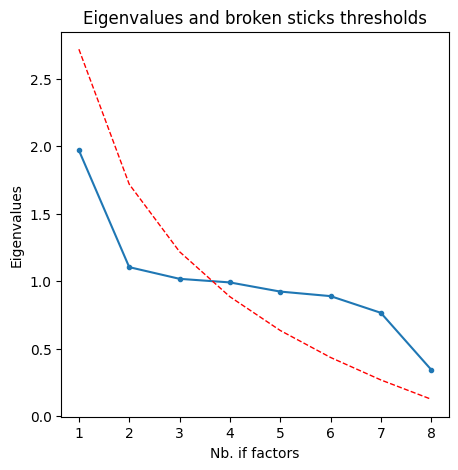

In [ ]:
# Broken sticks method
# threshold for the broken sticks
b = np.flip(np.cumsum(1/np.arange(p1,0,-1)))
print(f"thresholds for the broken sticks: {b}")

# plot eigenvalues
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p1+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. if factors")
ax.set_ylabel("Eigenvalues")
plt.title("Eigenvalues and broken sticks thresholds")

# add broken sticks thresholds
ax.plot(range(1,p1+1),b,"r--",linewidth=1)

plt.show()

In [ ]:
'''Step 5: Variable representation'''
print(pd.DataFrame(acp.col_coord_[:,:4],index=D1.columns, columns=['F1','F2','F3','F4']))

                               F1        F2        F3        F4
% completed orders user -0.125499  0.741447  0.042928 -0.135580
order_value_usd         -0.773041  0.060643 -0.043593 -0.089541
item_count              -0.872591 -0.054515  0.066227  0.010102
t04_picking_time        -0.392552 -0.098326  0.101765  0.206824
t05_cashier_time        -0.047725  0.106482 -0.592916  0.783829
out_of_stock            -0.645864 -0.088807  0.112345  0.057700
distance_km             -0.131427  0.277190 -0.700490 -0.478468
hora                     0.057075  0.664347  0.378886  0.272643


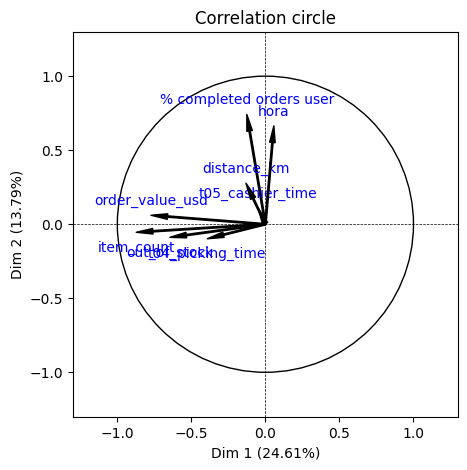

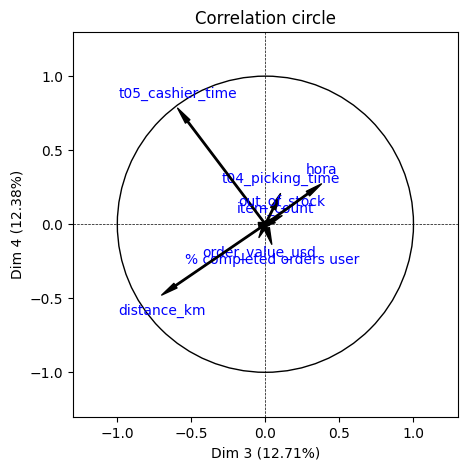

"The fourth dimension has a very high correlation on '% completed orders user' which could just be interpreted as\nthat specific variable."

In [ ]:
# Correlations circle
acp.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(5,5))
acp.correlation_circle(num_x_axis=3,num_y_axis=4, figsize=(5,5))
'''Interpretation of the two dimensions'''
'''Three variables have a quite negative correlation with Dim 1, which are item_count, picking_time
and cashier_time. This means the speed the store can get those orders ready, which, unsurprisingly, also partially
comes down to the size of the order. There is clearly a size effect in this dimension'''
'''Two variables have a quite negative correlation with Dim 2, which are distance_km and order_value_USD. This means
that whether the order is cheap and within a shorter distance, most likely being some everyday shopping needs versus
some more expensive order traveling a longer distance. This shows a shape effect while Dim 1 shows a size effect'''
'''Two variables have a quite strong positive correlation with Dim 3, namely 'hora' which means hour, meaning the
time in the day, and 'out_of_stock'. This indicates that this axis talks about a general time variation, since the
early an order is placed, the less likely that the specific item a customer wants would be sold out.'''
'''The fourth dimension has a very high correlation on '% completed orders user' which could just be interpreted as
that specific variable.'''

In [ ]:
# Cos² if the variables on the two first factors
print(pd.DataFrame(acp.col_cos2_[:,:4],index=D1.columns, columns=['F1','F2','F3','F4']))

                               F1        F2        F3        F4
% completed orders user  0.015750  0.549744  0.001843  0.018382
order_value_usd          0.597593  0.003678  0.001900  0.008018
item_count               0.761416  0.002972  0.004386  0.000102
t04_picking_time         0.154097  0.009668  0.010356  0.042776
t05_cashier_time         0.002278  0.011338  0.351549  0.614388
out_of_stock             0.417141  0.007887  0.012621  0.003329
distance_km              0.017273  0.076834  0.490687  0.228932
hora                     0.003258  0.441357  0.143555  0.074334


In [ ]:
# Cumulated Cos² on the two first factors
print(pd.DataFrame(np.cumsum(acp.col_cos2_[:,:4],axis=1),index=D1.columns, columns=['F1','F2',"F3",'F4']))

                               F1        F2        F3        F4
% completed orders user  0.015750  0.565494  0.567337  0.585719
order_value_usd          0.597593  0.601270  0.603171  0.611188
item_count               0.761416  0.764388  0.768774  0.768876
t04_picking_time         0.154097  0.163765  0.174122  0.216898
t05_cashier_time         0.002278  0.013616  0.365166  0.979553
out_of_stock             0.417141  0.425028  0.437649  0.440978
distance_km              0.017273  0.094107  0.584794  0.813726
hora                     0.003258  0.444615  0.588169  0.662503


In [ ]:
# Contributions of each variable on the two first factors (in %)
print(pd.DataFrame(acp.col_contrib_[:,:4],index=D1.columns, columns=['F1','F2',"F3",'F4']))

                                F1         F2         F3         F4
% completed orders user   0.799974  49.819219   0.181219   1.856273
order_value_usd          30.353066   0.333272   0.186881   0.809639
item_count               38.674015   0.269316   0.431317   0.010306
t04_picking_time          7.826953   0.876145   1.018398   4.319684
t05_cashier_time          0.115687   1.027515  34.570789  62.043040
out_of_stock             21.187511   0.714719   1.241167   0.336198
distance_km               0.877336   6.962904  48.253303  23.118347
hora                      0.165457  39.996911  14.116926   7.506513


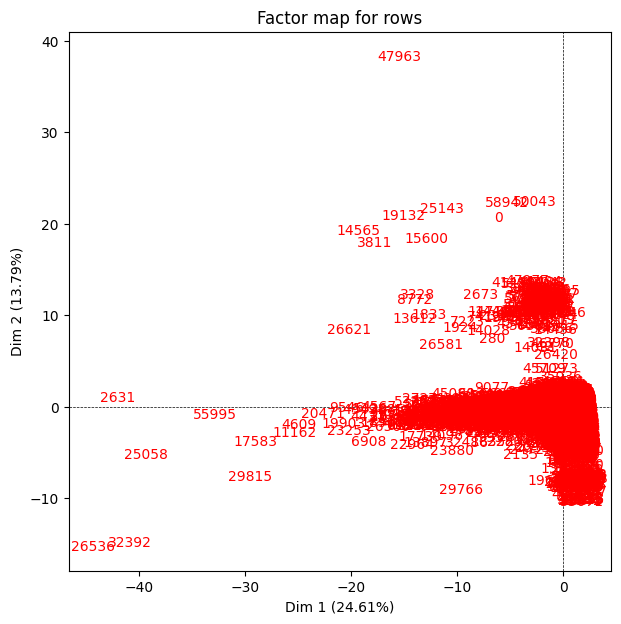

In [ ]:
# chart of the individuals
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(7,7))

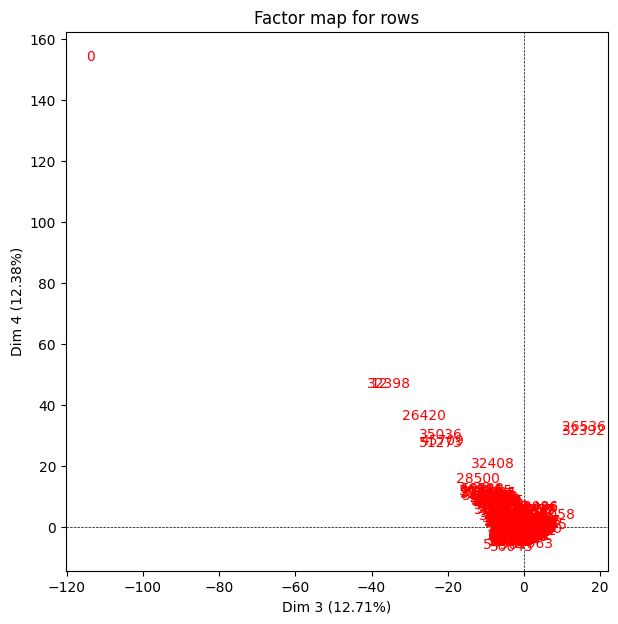

'From this factor map, we can see clearly that if we use Dim 3 and Dim 4 as our x1 and x2 axis and plot the data\npoints, there is a CLEAR tendency that different clusters are formed likely due to the variance introduced by\ndifferent rows, aka different groups of the customers behaving differently'

In [ ]:
# chart of the individuals
acp.mapping_row(num_x_axis=3,num_y_axis=4,figsize=(7,7))
'''From this factor map, we can see clearly that if we use Dim 3 and Dim 4 as our x1 and x2 axis and plot the data
points, there is a CLEAR tendency that different clusters are formed likely due to the variance introduced by
different rows, aka different groups of the customers behaving differently'''

In [ ]:
# creating a new data frame with the row coordinates of F1, F2, F3 and F4
df_row_coord = pd.DataFrame(np.cumsum(acp.row_coord_[:,:4],axis=1),index=D1.index, columns=['F1','F2','F3',"F4"])
df_row_coord.head(5)

F1         F2         F3         F4
0 -6.142553  14.557220 -99.246468  55.013016
1  0.484956  -5.270135  -6.867556  -7.216969
2 -2.967449  -2.721901  -3.666750  -4.545104
4 -0.097806   0.008864  -0.771874  -1.471199
6  1.002055  -7.048105  -6.399151  -3.986282

In [ ]:
mask = df_row_coord['F1'] == df_row_coord['F1'].min()
df_row_coord.loc[df_row_coord[mask].index, :]

F1         F2         F3         F4
26536 -44.345463 -59.601548 -43.958497 -11.103931

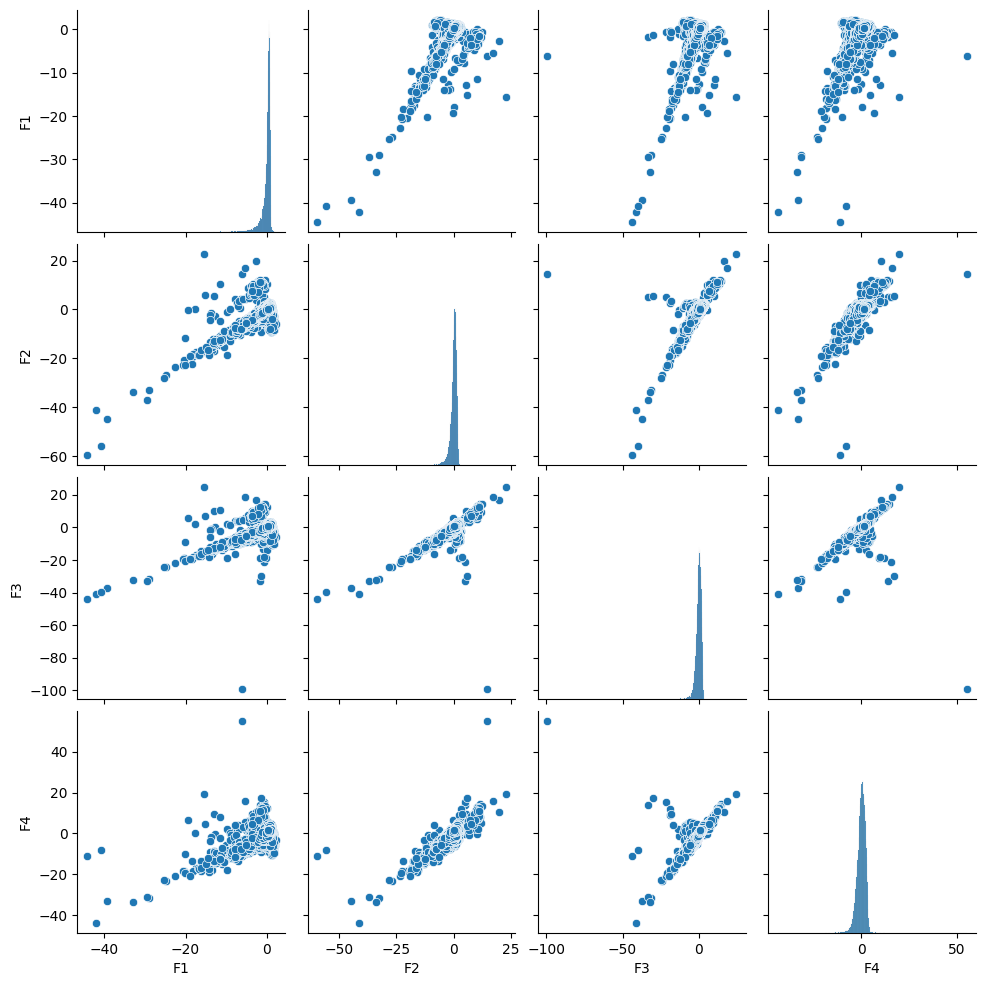

In [ ]:
'''Clustering'''
'''Plotting them one axis by another first'''
sns.pairplot(df_row_coord)

In [ ]:
df_row_coord1 = df_row_coord.copy()
if df_row_coord1.shape[0] == y.shape[0]:
   df_row_coord1['bad_order'] = y
    sns.pairplot(df_row_coord1, hue='bad_order')


In [ ]:
display(df_row_coord.head(3))
display(df_row_coord1.head(3))
display(df_row_coord1['bad_order'].mean())

In [ ]:
'''clustering with K-Means'''
from sklearn.cluster import KMeans

X = df_row_coord.values

km = KMeans(n_clusters = 2, init = 'k-means++' , n_init = 10, max_iter = 300, random_state = 0, tol = 0.0001)

y_km = km.fit_predict(X)

In [ ]:
km.labels_
from collections import Counter
unique_counts = Counter(km.labels_)
display(unique_counts)

Counter({0: 15782, 1: 45604})

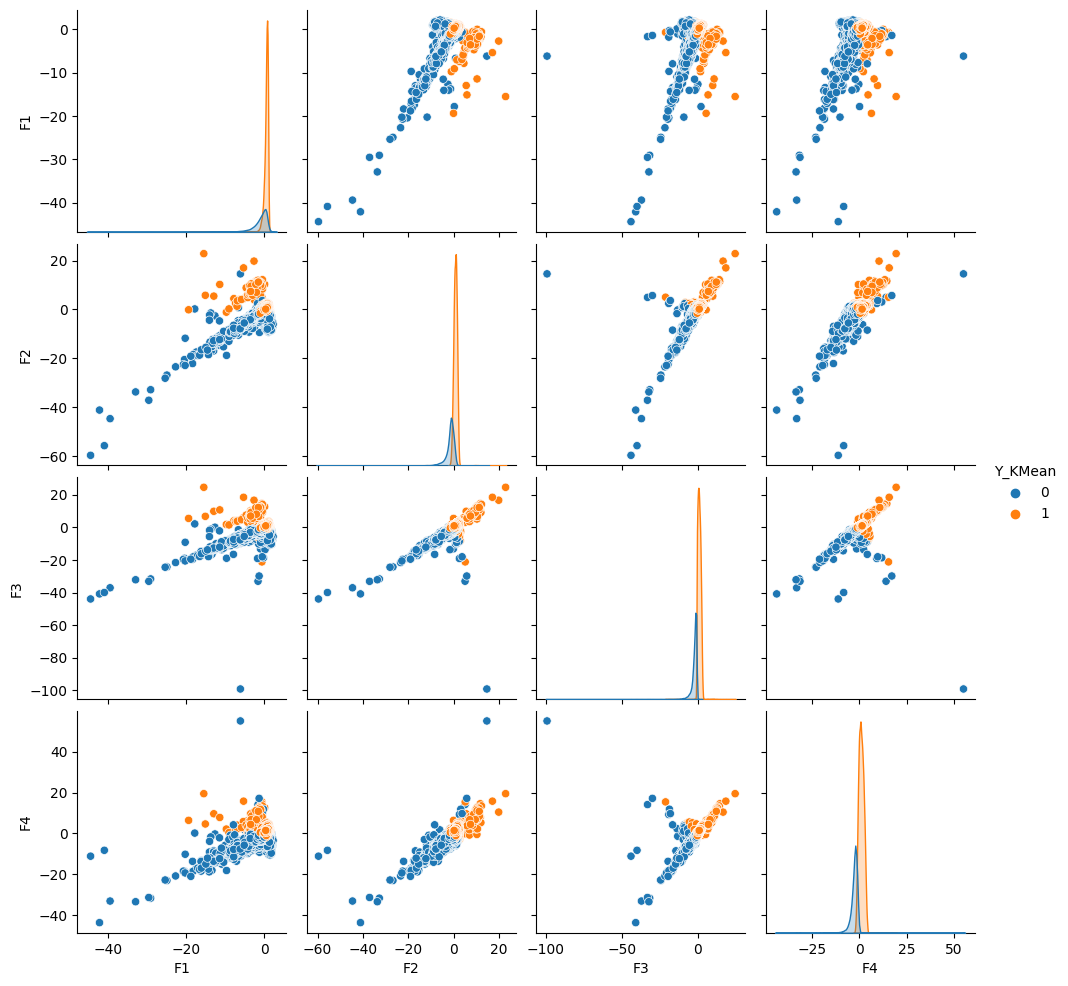

In [ ]:
#Added the clustering info to the dataframe, but it won't affect the original X since X was done in the front as
#X = df_row_coord.values
df_row_coord['Y_KMean'] = y_km
sns.pairplot(df_row_coord, hue='Y_KMean')

In [ ]:
from sklearn.cluster import DBSCAN
eps_list = [0.2, 0.5, 1, 2, 2.2, 2.5, 2.7, 3, 4, 5]
for eps_ in eps_list
    DBSCAN_model = DBSCAN(eps = eps_, min_samples=5, metric='euclidean')
    DBSCAN_model.fit_predict(X)
    y_DBSCAN = DBSCAN_model.labels_
    df_row_coord['Y_DBSCAN'] = y_DBSCAN
    display(df_row_coord['Y_DBSCAN'].value_counts())
    sns.pairplot(df_row_coord.drop(columns = ['Y_KMean']), hue='Y_DBSCAN')

NameError: ignored